In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.cm import inferno
from matplotlib.cm import magma
from matplotlib.colors import to_hex
import seaborn as sns

import ipywidgets as widgets
from datetime import datetime

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

# Merging Data

In [2]:
# Load in each data set (stringency level, population data, data on deaths, data on cases)
strinData = pd.read_csv("files/StringencyData.csv")
popData = pd.read_csv("files/StatePopulation.csv")
deathData = pd.read_csv("files/AUDEATHS.csv")
caseData = pd.read_csv("files/COVID_AU_state.csv")


In [3]:
strinData

,Unnamed: 0,NSW,Vic,Qld,SA,WA,Tas,NT,ACT
0,01/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,37.96
1,02/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,37.96
2,03/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,43.52
3,04/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,43.52
4,05/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,43.52
...,...,...,...,...,...,...,...,...,...
181,29/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81
182,30/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81
183,31/12/2020,56.94,46.30,49.07,42.59,37.04,39.81,25.00,39.81
184,The state level index excludes the impact of f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Normalise stringency data
strinData.columns = ["DATE", "NSW", "VIC", "QLD", "SA", "WA", "TAS","NT", "ACT"]
strinData = strinData.drop([184, 185])
strinData

,DATE,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,01/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,37.96
1,02/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,37.96
2,03/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,43.52
3,04/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,43.52
4,05/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,43.52
...,...,...,...,...,...,...,...,...,...
179,27/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81
180,28/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81
181,29/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81
182,30/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81


In [5]:
# Create new data frame (totalData), by creating a melted dataframe of stringency data
# This breaks up the data by day and by state, i.e. having a separate column for each state and each day, 
# rather than a column for each day with a separate column for each state
totalData = pd.melt(strinData, id_vars = ["DATE"], var_name = 'STATE')
totalData.rename(columns={'value':'STRINGENCY_LEVEL'}, inplace=True)
totalData


,DATE,STATE,STRINGENCY_LEVEL
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


In [6]:
popData

,Unnamed: 0,Population at 31 Mar 2021 ('000),Change over previous year ('000),Change over previous year (%)
0,New South Wales,8176.4,11.7,0.1
1,Victoria,6648.6,-42.9,-0.6
2,Queensland,5206.4,43.9,0.9
3,South Australia,1771.7,2.7,0.2
4,Western Australia,2675.8,15.2,0.6
5,Tasmania,542.0,2.1,0.4
6,Northern Territory,247.0,1.2,0.5
7,Australian Capital Territory,431.8,1.7,0.4
8,Australia (a),25704.3,35.7,0.1
9,a. Includes Other Territories comprising Jervi...,NaN,NaN,NaN


In [7]:
# formatting population data
popData.columns = ["STATE", "POPULATION", "x", "y"]
popData = popData[["STATE", "POPULATION"]]
popData = popData.drop([8,9,10])
popData["STATE"] = ["NSW", "VIC", "QLD", "SA", "WA", "TAS","NT", "ACT"]
popData["POPULATION"] = popData["POPULATION"] * 1000
popData

,STATE,POPULATION
0,NSW,8176400.0
1,VIC,6648600.0
2,QLD,5206400.0
3,SA,1771700.0
4,WA,2675800.0
5,TAS,542000.0
6,NT,247000.0
7,ACT,431800.0


In [8]:
# Adding a population column to the totalData, mapping it to the appropriate state column
totalData["POPULATION"] = totalData.STATE.map(popData.set_index("STATE")["POPULATION"])
totalData

,DATE,STATE,STRINGENCY_LEVEL,POPULATION
0,01/07/2020,NSW,43.52,8176400.0
1,02/07/2020,NSW,43.52,8176400.0
2,03/07/2020,NSW,43.52,8176400.0
3,04/07/2020,NSW,43.52,8176400.0
4,05/07/2020,NSW,43.52,8176400.0
...,...,...,...,...
1467,27/12/2020,ACT,39.81,431800.0
1468,28/12/2020,ACT,39.81,431800.0
1469,29/12/2020,ACT,39.81,431800.0
1470,30/12/2020,ACT,39.81,431800.0


In [9]:
# we need to properly format the date data from the caseData in order to merge it with the totalData dataframe
# so we will split up the date column into year, month, day and then set the date column in the proper format using those values

# initialising a column for year, month, day, and day of the year (1-365) in the caseData dataframe
caseData["year"] = caseData["date"]
caseData["month"] = caseData["date"]
caseData["day"] = caseData["date"]
caseData["day_of_year"] = caseData["date"]

In [10]:
# setting year, month, day and day of the year based on breaking up the date column
for i in range(0, len(caseData)):
    caseData["year"][i] = caseData["date"].str.split(pat="-")[i][0]
    caseData["month"][i] = caseData["date"].str.split(pat="-")[i][1]
    caseData["day"][i] = caseData["date"].str.split(pat="-")[i][2]
    caseData["day_of_year"][i] = datetime.strptime(caseData["date"][i], '%Y-%m-%d').timetuple().tm_yday

<ipython-input-10-6535f27a3eb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caseData["year"][i] = caseData["date"].str.split(pat="-")[i][0]
<ipython-input-10-6535f27a3eb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caseData["month"][i] = caseData["date"].str.split(pat="-")[i][1]
<ipython-input-10-6535f27a3eb5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caseData["day"][i] = caseData["date"].str.split(pat="-")[i][2]
<ipy

In [11]:
# reset the date column using the day, month and year 
caseData.date = caseData["day"] + "/" + caseData["month"] + "/" + caseData["year"]

In [12]:
# cast the year, month, day, day of year columns to int so we can use them later
caseData["year"] = caseData["year"].astype(int)
caseData["month"] = caseData["month"].astype(int)
caseData["day"] = caseData["day"].astype(int)
caseData["day_of_year"] = caseData["day_of_year"].astype(int)

In [13]:
# setting the caseData to the same range as the totalData (i.e. from July-December 2020)
caseData = caseData.drop(caseData[caseData.month < 7].index)
caseData = caseData.drop(caseData[caseData.year == 2021].index)

In [14]:
# put the caseData and the totalData in the same order, with the same index
caseData = caseData.reset_index()
totalData = totalData.reset_index()
caseData = caseData.sort_values(by = ['state_abbrev', 'index'])
totalData = totalData.sort_values(by = ['STATE', 'index'])
caseData = caseData.reset_index(drop = True)
totalData = totalData.reset_index(drop = True)

In [15]:
caseData

,index,date,state,state_abbrev,confirmed,confirmed_cum,deaths,deaths_cum,tests,tests_cum,...,icu,icu_cum,vent,vent_cum,vaccines,vaccines_cum,year,month,day,day_of_year
0,1264,01/07/2020,Australian Capital Territory,ACT,0,108,0,3,739,30332,...,0,0,0,0,0,0.0,2020,7,1,183
1,1272,02/07/2020,Australian Capital Territory,ACT,0,108,0,3,865,31197,...,0,0,0,0,0,0.0,2020,7,2,184
2,1280,03/07/2020,Australian Capital Territory,ACT,0,108,0,3,366,31563,...,0,0,0,0,0,0.0,2020,7,3,185
3,1288,04/07/2020,Australian Capital Territory,ACT,0,108,0,3,453,32016,...,0,0,0,0,0,0.0,2020,7,4,186
4,1296,05/07/2020,Australian Capital Territory,ACT,0,108,0,3,257,32273,...,0,0,0,0,0,0.0,2020,7,5,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2703,27/12/2020,Western Australia,WA,2,855,0,9,0,612889,...,0,0,0,0,0,0.0,2020,12,27,362
1468,2711,28/12/2020,Western Australia,WA,3,858,0,9,0,612889,...,0,0,0,0,0,0.0,2020,12,28,363
1469,2719,29/12/2020,Western Australia,WA,1,859,0,9,7986,620875,...,0,0,0,0,0,0.0,2020,12,29,364
1470,2727,30/12/2020,Western Australia,WA,0,859,0,9,2810,623685,...,0,0,0,0,0,0.0,2020,12,30,365


In [16]:
# now that the data is in the same order in both dataframes, can just directly bring over the columns from caseData into totalData
totalData["CASES"] = caseData["confirmed"]
totalData["DEATHS"] = caseData["deaths"]
totalData["DAY"] = caseData["day_of_year"]
totalData["MONTH"] = caseData["month"]
totalData["CUM_CASES"] = caseData["confirmed_cum"]
totalData["CUM_DEATHS"] = caseData["deaths_cum"]

In [17]:
totalData

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
0,1288,01/07/2020,ACT,37.96,431800.0,0,0,183,7,108,3
1,1289,02/07/2020,ACT,37.96,431800.0,0,0,184,7,108,3
2,1290,03/07/2020,ACT,43.52,431800.0,0,0,185,7,108,3
3,1291,04/07/2020,ACT,43.52,431800.0,0,0,186,7,108,3
4,1292,05/07/2020,ACT,43.52,431800.0,0,0,187,7,108,3
...,...,...,...,...,...,...,...,...,...,...,...
1467,915,27/12/2020,WA,37.04,2675800.0,2,0,362,12,855,9
1468,916,28/12/2020,WA,37.04,2675800.0,3,0,363,12,858,9
1469,917,29/12/2020,WA,37.04,2675800.0,1,0,364,12,859,9
1470,918,30/12/2020,WA,37.04,2675800.0,0,0,365,12,859,9


In [18]:
totalData['STATE'].unique()


array(['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'], dtype=object)

In [19]:
ACTData = totalData[totalData['STATE'] == 'ACT']
ACTData

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
0,1288,01/07/2020,ACT,37.96,431800.0,0,0,183,7,108,3
1,1289,02/07/2020,ACT,37.96,431800.0,0,0,184,7,108,3
2,1290,03/07/2020,ACT,43.52,431800.0,0,0,185,7,108,3
3,1291,04/07/2020,ACT,43.52,431800.0,0,0,186,7,108,3
4,1292,05/07/2020,ACT,43.52,431800.0,0,0,187,7,108,3
...,...,...,...,...,...,...,...,...,...,...,...
179,1467,27/12/2020,ACT,39.81,431800.0,0,0,362,12,118,3
180,1468,28/12/2020,ACT,39.81,431800.0,0,0,363,12,118,3
181,1469,29/12/2020,ACT,39.81,431800.0,0,0,364,12,118,3
182,1470,30/12/2020,ACT,39.81,431800.0,0,0,365,12,118,3


In [20]:
ACTData.columns

Index(['index', 'DATE', 'STATE', 'STRINGENCY_LEVEL', 'POPULATION', 'CASES',
       'DEATHS', 'DAY', 'MONTH', 'CUM_CASES', 'CUM_DEATHS'],
      dtype='object')

In [21]:
NSWData = totalData[totalData['STATE'] == 'NSW']
NSWData

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
184,0,01/07/2020,NSW,43.52,8176400.0,14,0,183,7,3392,50
185,1,02/07/2020,NSW,43.52,8176400.0,8,0,184,7,3400,50
186,2,03/07/2020,NSW,43.52,8176400.0,0,0,185,7,3400,50
187,3,04/07/2020,NSW,43.52,8176400.0,5,0,186,7,3405,50
188,4,05/07/2020,NSW,43.52,8176400.0,14,0,187,7,3419,50
...,...,...,...,...,...,...,...,...,...,...,...
363,179,27/12/2020,NSW,60.65,8176400.0,11,0,362,12,4858,54
364,180,28/12/2020,NSW,60.65,8176400.0,14,1,363,12,4872,55
365,181,29/12/2020,NSW,60.65,8176400.0,9,0,364,12,4881,55
366,182,30/12/2020,NSW,60.65,8176400.0,25,0,365,12,4906,55


In [22]:

NTData = totalData[totalData['STATE'] == 'NT']
NTData

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
368,1104,01/07/2020,NT,27.78,247000.0,0,0,183,7,29,0
369,1105,02/07/2020,NT,27.78,247000.0,1,0,184,7,30,0
370,1106,03/07/2020,NT,27.78,247000.0,0,0,185,7,30,0
371,1107,04/07/2020,NT,27.78,247000.0,0,0,186,7,30,0
372,1108,05/07/2020,NT,27.78,247000.0,0,0,187,7,30,0
...,...,...,...,...,...,...,...,...,...,...,...
547,1283,27/12/2020,NT,25.00,247000.0,0,0,362,12,73,0
548,1284,28/12/2020,NT,25.00,247000.0,0,0,363,12,73,0
549,1285,29/12/2020,NT,25.00,247000.0,1,0,364,12,74,0
550,1286,30/12/2020,NT,25.00,247000.0,0,0,365,12,74,0


In [23]:
QLDData = totalData[totalData['STATE'] == 'QLD']
QLDData

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
552,368,01/07/2020,QLD,46.30,5206400.0,0,0,183,7,1067,6
553,369,02/07/2020,QLD,46.30,5206400.0,0,0,184,7,1067,6
554,370,03/07/2020,QLD,46.30,5206400.0,0,0,185,7,1067,6
555,371,04/07/2020,QLD,46.30,5206400.0,0,0,186,7,1067,6
556,372,05/07/2020,QLD,46.30,5206400.0,0,0,187,7,1067,6
...,...,...,...,...,...,...,...,...,...,...,...
731,547,27/12/2020,QLD,49.07,5206400.0,0,0,362,12,1241,6
732,548,28/12/2020,QLD,49.07,5206400.0,5,0,363,12,1246,6
733,549,29/12/2020,QLD,49.07,5206400.0,2,0,364,12,1248,6
734,550,30/12/2020,QLD,49.07,5206400.0,2,0,365,12,1250,6


In [24]:
SAData = totalData[totalData['STATE'] == 'SA']
SAData

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
736,552,01/07/2020,SA,37.04,1771700.0,0,0,183,7,443,4
737,553,02/07/2020,SA,37.04,1771700.0,0,0,184,7,443,4
738,554,03/07/2020,SA,37.04,1771700.0,0,0,185,7,443,4
739,555,04/07/2020,SA,37.04,1771700.0,0,0,186,7,443,4
740,556,05/07/2020,SA,37.04,1771700.0,0,0,187,7,443,4
...,...,...,...,...,...,...,...,...,...,...,...
915,731,27/12/2020,SA,42.59,1771700.0,2,0,362,12,571,4
916,732,28/12/2020,SA,42.59,1771700.0,1,0,363,12,572,4
917,733,29/12/2020,SA,42.59,1771700.0,0,0,364,12,572,4
918,734,30/12/2020,SA,42.59,1771700.0,3,0,365,12,575,4


In [25]:

TASData = totalData[totalData['STATE'] == 'TAS']
TASData

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
920,920,01/07/2020,TAS,52.78,542000.0,0,0,183,7,228,13
921,921,02/07/2020,TAS,52.78,542000.0,0,0,184,7,228,13
922,922,03/07/2020,TAS,52.78,542000.0,0,0,185,7,228,13
923,923,04/07/2020,TAS,52.78,542000.0,0,0,186,7,228,13
924,924,05/07/2020,TAS,52.78,542000.0,0,0,187,7,228,13
...,...,...,...,...,...,...,...,...,...,...,...
1099,1099,27/12/2020,TAS,39.81,542000.0,0,0,362,12,234,13
1100,1100,28/12/2020,TAS,39.81,542000.0,0,0,363,12,234,13
1101,1101,29/12/2020,TAS,39.81,542000.0,0,0,364,12,234,13
1102,1102,30/12/2020,TAS,39.81,542000.0,0,0,365,12,234,13


In [26]:
VICData = totalData[totalData['STATE'] == 'VIC']
VICData

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
1104,184,01/07/2020,VIC,52.31,6648600.0,72,0,183,7,2231,20
1105,185,02/07/2020,VIC,52.31,6648600.0,72,0,184,7,2303,20
1106,186,03/07/2020,VIC,52.31,6648600.0,65,0,185,7,2368,20
1107,187,04/07/2020,VIC,52.31,6648600.0,101,0,186,7,2469,20
1108,188,05/07/2020,VIC,52.31,6648600.0,67,0,187,7,2536,20
...,...,...,...,...,...,...,...,...,...,...,...
1283,363,27/12/2020,VIC,46.30,6648600.0,1,0,362,12,20362,823
1284,364,28/12/2020,VIC,46.30,6648600.0,2,0,363,12,20364,823
1285,365,29/12/2020,VIC,46.30,6648600.0,0,0,364,12,20364,823
1286,366,30/12/2020,VIC,46.30,6648600.0,1,0,365,12,20365,823


In [27]:
WAData = totalData[totalData['STATE'] == 'WA']
WAData

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
1288,736,01/07/2020,WA,39.81,2675800.0,0,0,183,7,599,9
1289,737,02/07/2020,WA,39.81,2675800.0,0,0,184,7,599,9
1290,738,03/07/2020,WA,39.81,2675800.0,0,0,185,7,599,9
1291,739,04/07/2020,WA,39.81,2675800.0,0,0,186,7,599,9
1292,740,05/07/2020,WA,39.81,2675800.0,6,0,187,7,605,9
...,...,...,...,...,...,...,...,...,...,...,...
1467,915,27/12/2020,WA,37.04,2675800.0,2,0,362,12,855,9
1468,916,28/12/2020,WA,37.04,2675800.0,3,0,363,12,858,9
1469,917,29/12/2020,WA,37.04,2675800.0,1,0,364,12,859,9
1470,918,30/12/2020,WA,37.04,2675800.0,0,0,365,12,859,9


In [28]:
NoVic = totalData[totalData['STATE'] != 'VIC']
NoVic

,index,DATE,STATE,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS
0,1288,01/07/2020,ACT,37.96,431800.0,0,0,183,7,108,3
1,1289,02/07/2020,ACT,37.96,431800.0,0,0,184,7,108,3
2,1290,03/07/2020,ACT,43.52,431800.0,0,0,185,7,108,3
3,1291,04/07/2020,ACT,43.52,431800.0,0,0,186,7,108,3
4,1292,05/07/2020,ACT,43.52,431800.0,0,0,187,7,108,3
...,...,...,...,...,...,...,...,...,...,...,...
1467,915,27/12/2020,WA,37.04,2675800.0,2,0,362,12,855,9
1468,916,28/12/2020,WA,37.04,2675800.0,3,0,363,12,858,9
1469,917,29/12/2020,WA,37.04,2675800.0,1,0,364,12,859,9
1470,918,30/12/2020,WA,37.04,2675800.0,0,0,365,12,859,9


# Data Analysis

This project will analyse the effect of lockdowns on COVID-19 case and death numbers. The strength of the lockdown is represented through the STRINGENCY_LEVEL column of the totalData dataframe. A Linear Regression model will be used to predict case numbers from the stringency level. 

First, the data will be analysed to get familiar with it, and also get an idea of its shape.

The data consists of a list of dates from July-December of 2020 and has statistics for number of cases, state, stringency level, date, day of the year, population and deaths. 

### General Analysis

First, cases will be plotted over time, and then stringency level will be compared to cases over time. This will give a good idea of the general relationships in the data, and whether a linear model will be effective at predicting cases. 

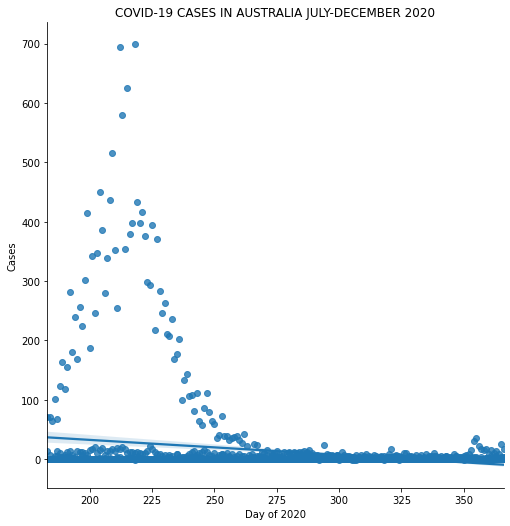

In [29]:
fig = sns.lmplot(data=totalData, x='DAY', y='CASES', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN AUSTRALIA JULY-DECEMBER 2020")

(170.0, 366.0)

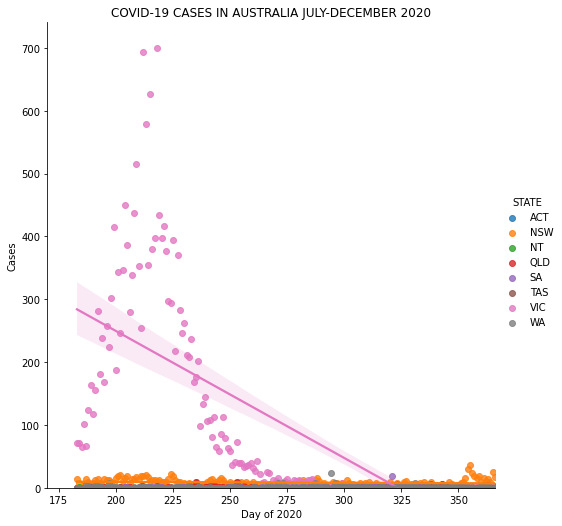

In [30]:
fig = sns.lmplot(data=totalData, x='DAY', y='CASES', height = 7, hue='STATE')
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN AUSTRALIA JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

Obviously Victoria is a big outlier, so it will be considered separately in graphs.

(170.0, 366.0)

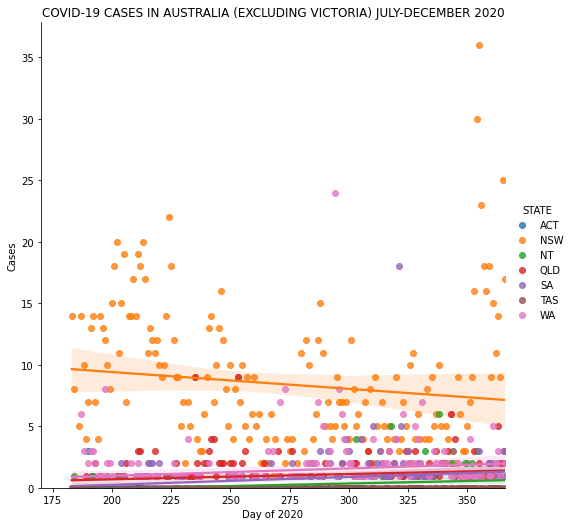

In [31]:
fig = sns.lmplot(data=NoVic, x='DAY', y='CASES', height = 7, hue='STATE')
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN AUSTRALIA (EXCLUDING VICTORIA) JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

It is worth looking closely at the cases in Victoria and NSW.

(170.0, 366.0)

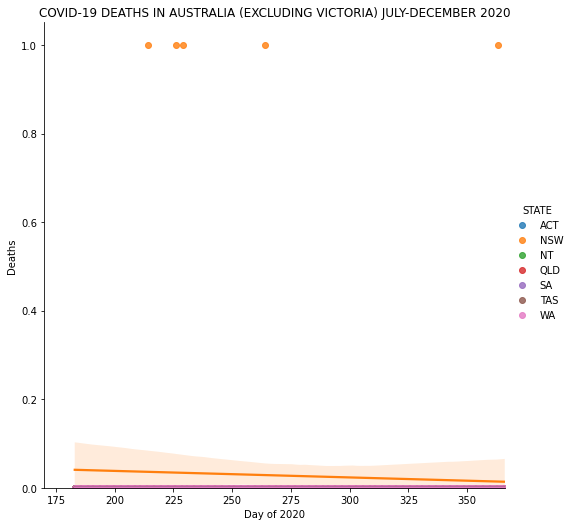

In [32]:
fig = sns.lmplot(data=NoVic, x='DAY', y='DEATHS', height = 7, hue='STATE')
fig.set(xlabel = "Day of 2020", ylabel = "Deaths", title = "COVID-19 DEATHS IN AUSTRALIA (EXCLUDING VICTORIA) JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

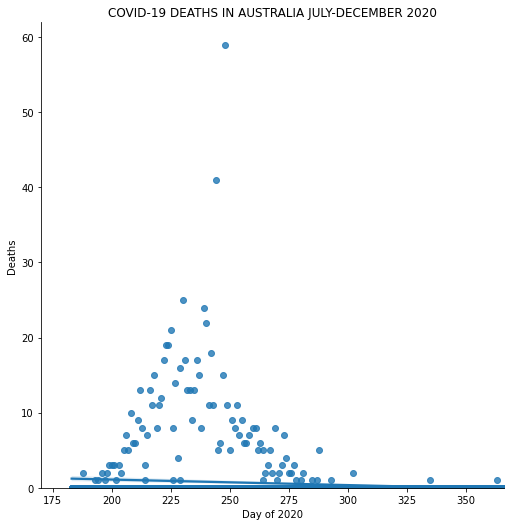

In [33]:
fig = sns.lmplot(data=totalData, x='DAY', y='DEATHS', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Deaths", title = "COVID-19 DEATHS IN AUSTRALIA JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

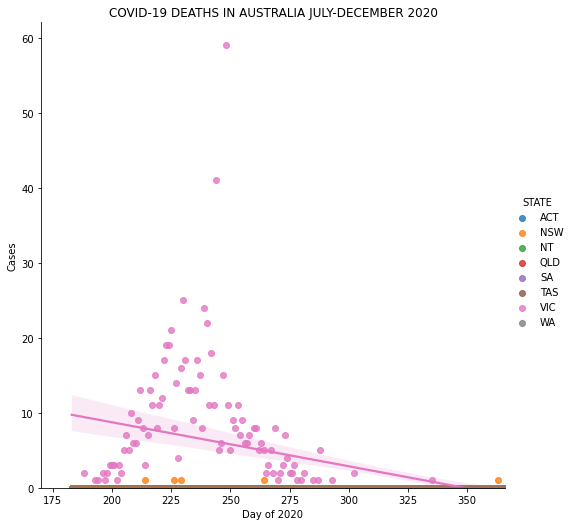

In [34]:
fig = sns.lmplot(data=totalData, x='DAY', y='DEATHS', height = 7, hue='STATE')
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 DEATHS IN AUSTRALIA JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

It is only worth looking closely at the deaths in Victoria and not in any other state.

(170.0, 366.0)

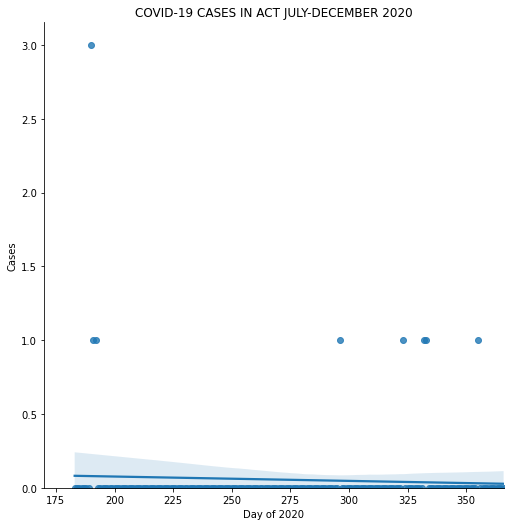

In [35]:
fig = sns.lmplot(data=ACTData, x='DAY', y='CASES', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN ACT JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

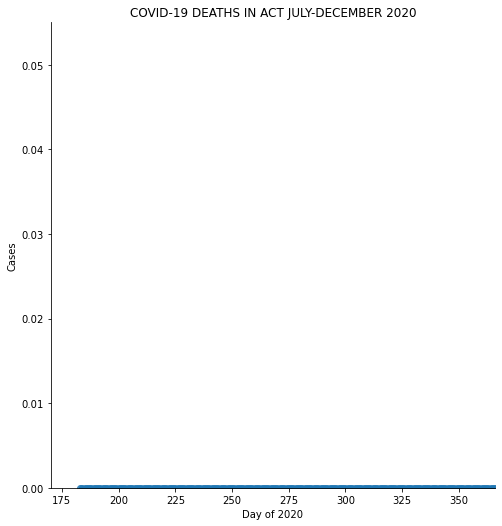

In [36]:
fig = sns.lmplot(data=ACTData, x='DAY', y='DEATHS', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 DEATHS IN ACT JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

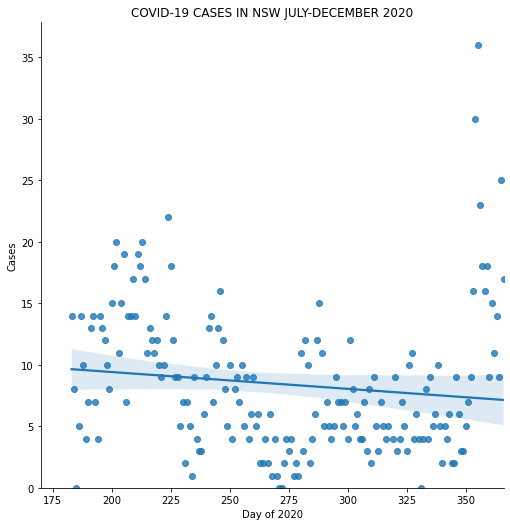

In [37]:
fig = sns.lmplot(data=NSWData, x='DAY', y='CASES', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN NSW JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

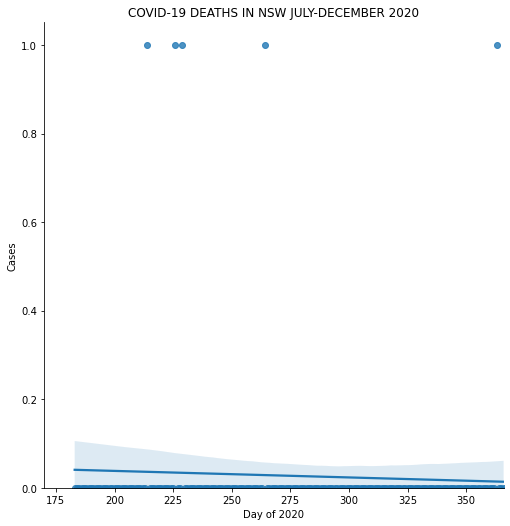

In [38]:
fig = sns.lmplot(data=NSWData, x='DAY', y='DEATHS', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 DEATHS IN NSW JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

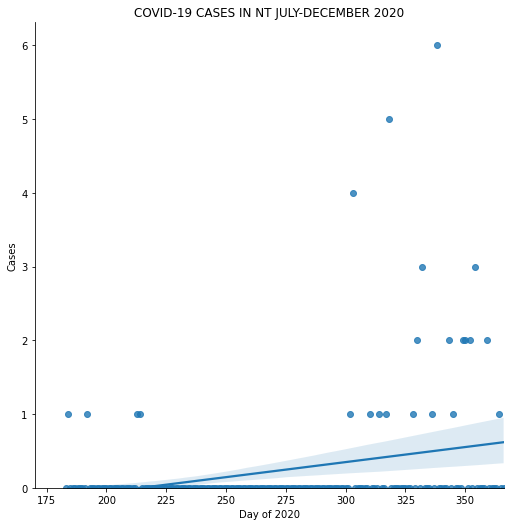

In [39]:
fig = sns.lmplot(data=NTData, x='DAY', y='CASES', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN NT JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

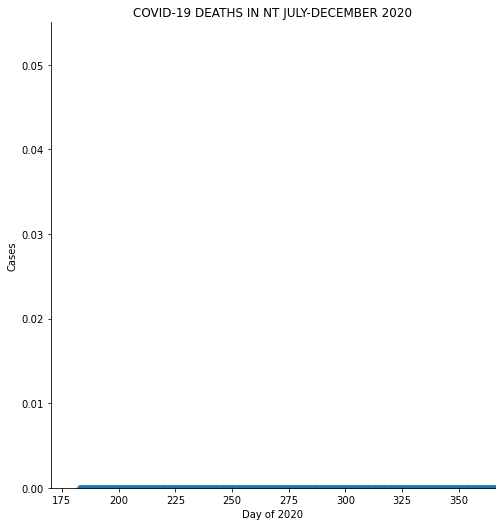

In [40]:
fig = sns.lmplot(data=NTData, x='DAY', y='DEATHS', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 DEATHS IN NT JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

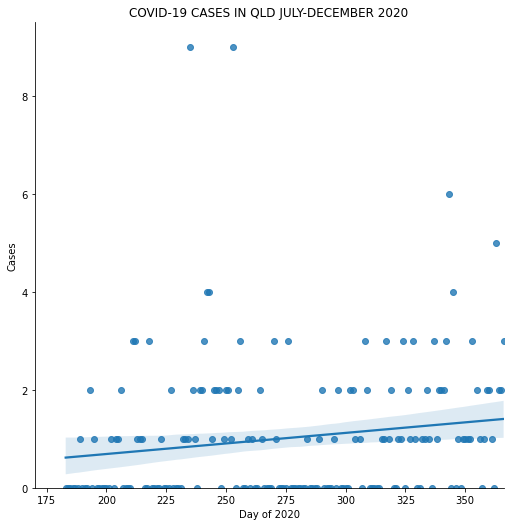

In [41]:
fig = sns.lmplot(data=QLDData, x='DAY', y='CASES', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN QLD JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

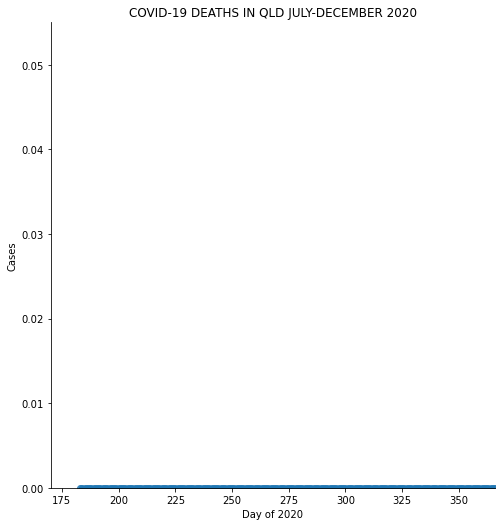

In [42]:
fig = sns.lmplot(data=QLDData, x='DAY', y='DEATHS', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 DEATHS IN QLD JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

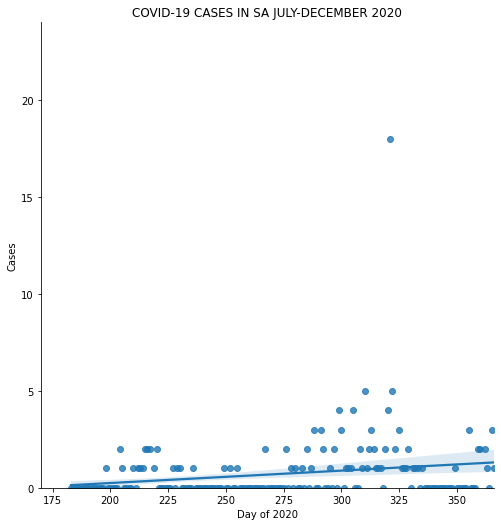

In [43]:
fig = sns.lmplot(data=SAData, x='DAY', y='CASES', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN SA JULY-DECEMBER 2020")
plt.ylim(0,24)
plt.xlim(170,None)

(170.0, 366.0)

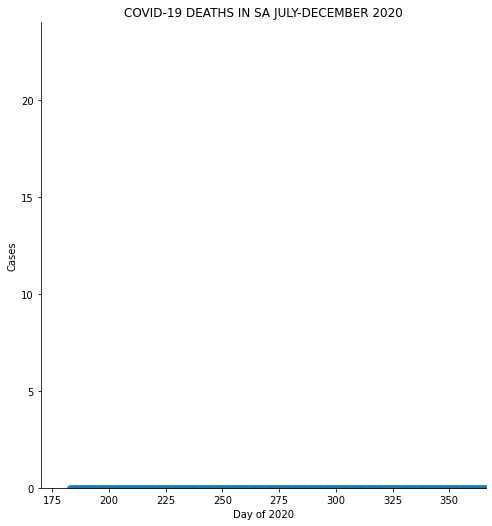

In [44]:
fig = sns.lmplot(data=SAData, x='DAY', y='DEATHS', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 DEATHS IN SA JULY-DECEMBER 2020")
plt.ylim(0,24)
plt.xlim(170,None)

(170.0, 366.0)

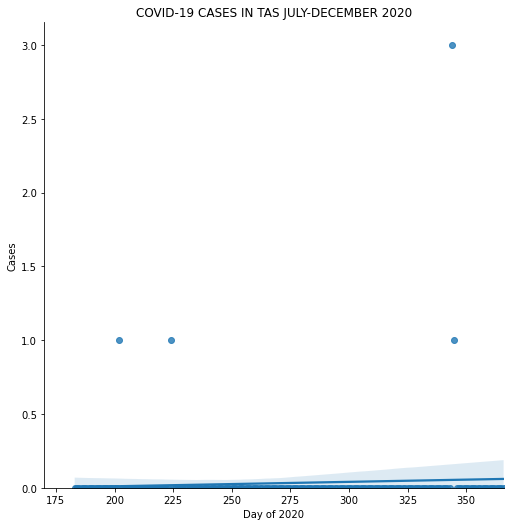

In [45]:
fig = sns.lmplot(data=TASData, x='DAY', y='CASES', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN TAS JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

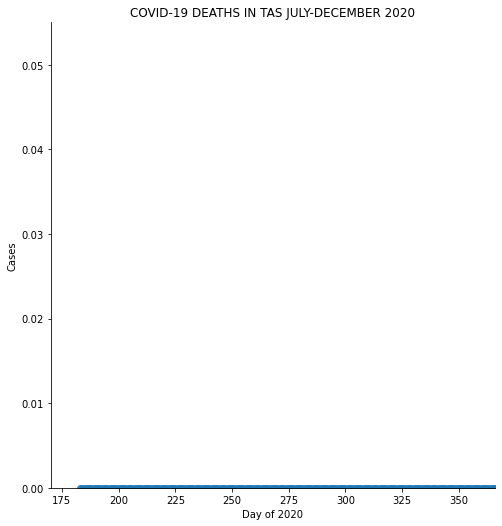

In [46]:
fig = sns.lmplot(data=TASData, x='DAY', y='DEATHS', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 DEATHS IN TAS JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

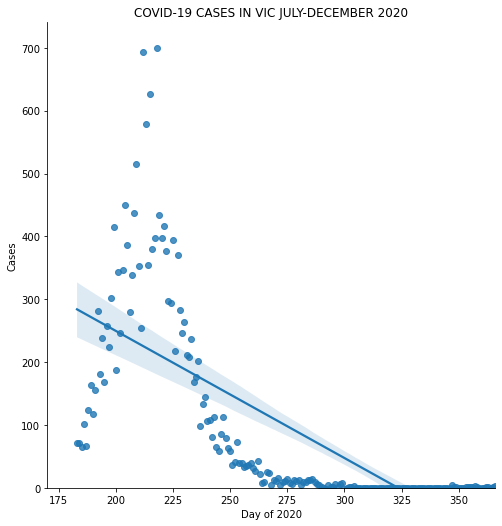

In [47]:
fig = sns.lmplot(data=VICData, x='DAY', y='CASES', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN VIC JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

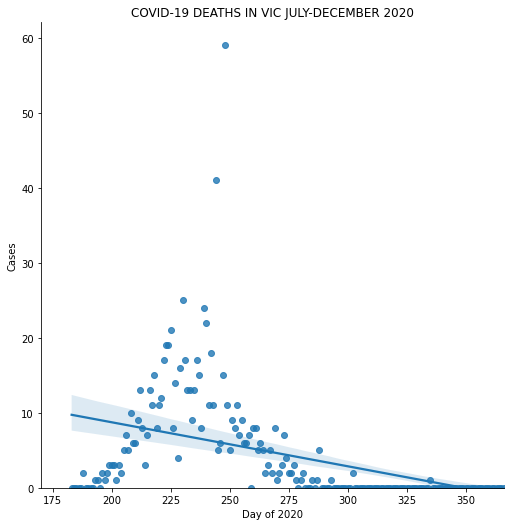

In [48]:
fig = sns.lmplot(data=VICData, x='DAY', y='DEATHS', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 DEATHS IN VIC JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

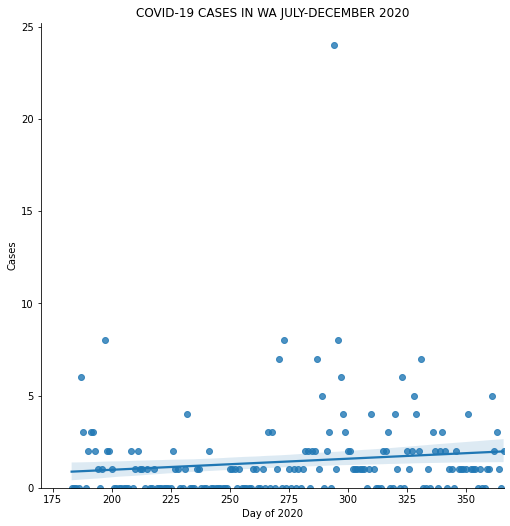

In [49]:
fig = sns.lmplot(data=WAData, x='DAY', y='CASES', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 CASES IN WA JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

(170.0, 366.0)

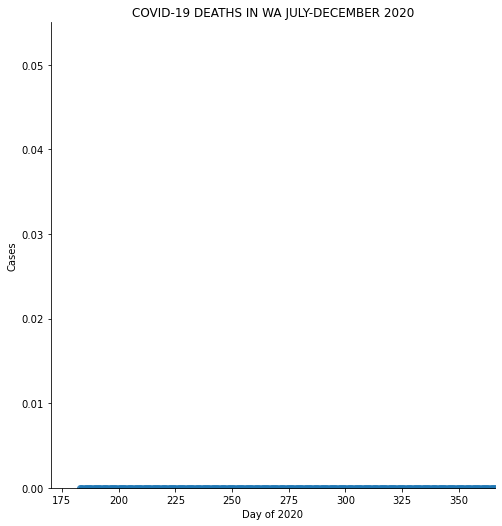

In [50]:
fig = sns.lmplot(data=WAData, x='DAY', y='DEATHS', height = 7)
fig.set(xlabel = "Day of 2020", ylabel = "Cases", title = "COVID-19 DEATHS IN WA JULY-DECEMBER 2020")
plt.ylim(0,None)
plt.xlim(170,None)

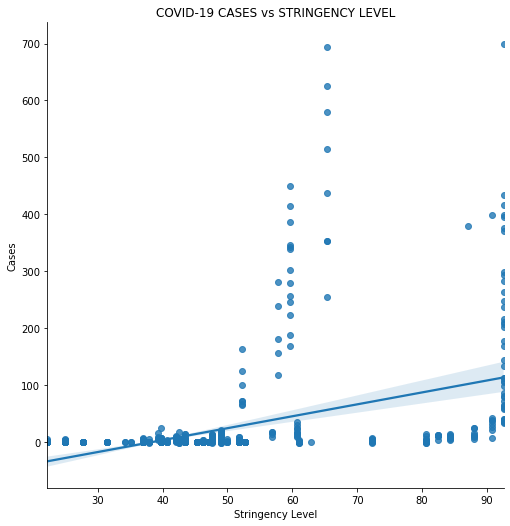

In [51]:
fig = sns.lmplot(data=totalData, x='STRINGENCY_LEVEL', y='CASES', height = 7)
fig.set(xlabel = "Stringency Level", ylabel = "Cases", title = "COVID-19 CASES vs STRINGENCY LEVEL")

(0.0, 100.0)

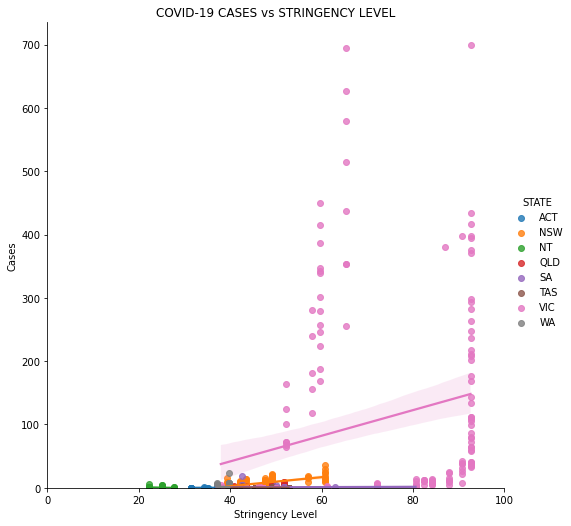

In [52]:
fig = sns.lmplot(data=totalData, x='STRINGENCY_LEVEL', y='CASES', height = 7, hue = 'STATE')
fig.set(xlabel = "Stringency Level", ylabel = "Cases", title = "COVID-19 CASES vs STRINGENCY LEVEL")
plt.ylim(0,None)
plt.xlim(0,100)

Above is a plot of lockdown stringency level vs covid cases. Again, Victoria is a massive outlier, with cases peaking in the 700s even with very high stringency levels. It is hypothesised that this is due to lockdown strength increasing as cases balloon, and the cases will take some time to trickle down while a stringent lockdown is maintained.


(0.0, 100.0)

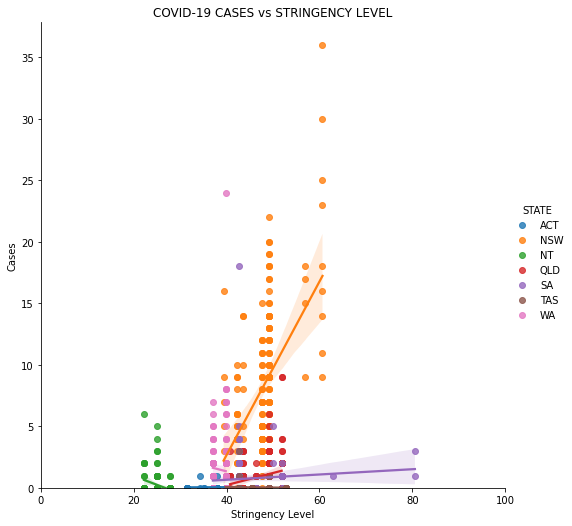

In [53]:
fig = sns.lmplot(data=NoVic, x='STRINGENCY_LEVEL', y='CASES', height = 7, hue = 'STATE')
fig.set(xlabel = "Stringency Level", ylabel = "Cases", title = "COVID-19 CASES vs STRINGENCY LEVEL")
plt.ylim(0,None)
plt.xlim(0,100)

From looking at the plot of stringency level vs covid-19 cases and excluding the outlier of Victoria, NSW experienced the highest amount of cases and also a relatively high stringency level. However, it is now easier to see a harsher lockdown possibly being able to squash an outbreak, as can be seen with South Australia in purple. Their highest number of cases recorded was below 20, and they even moved to a stringency level in the 80s, approaching that of Victoria. 

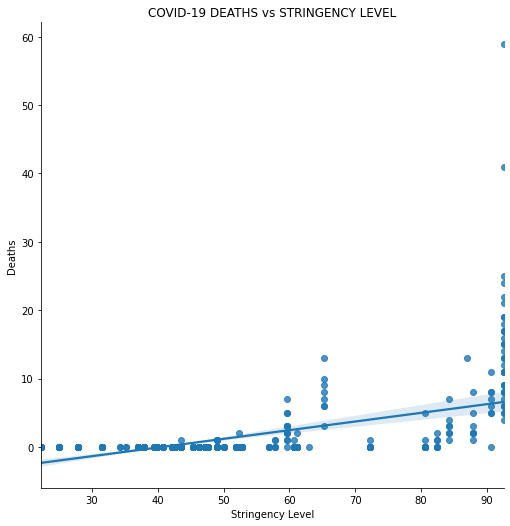

In [54]:
fig = sns.lmplot(data=totalData, x='STRINGENCY_LEVEL', y='DEATHS', height = 7)
fig.set(xlabel = "Stringency Level", ylabel = "Deaths", title = "COVID-19 DEATHS vs STRINGENCY LEVEL")

(0.0, 100.0)

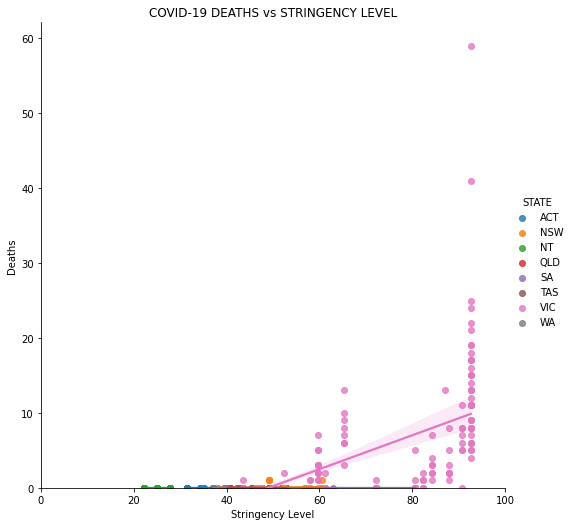

In [55]:
fig = sns.lmplot(data=totalData, x='STRINGENCY_LEVEL', y='DEATHS', height = 7, hue = 'STATE')
fig.set(xlabel = "Stringency Level", ylabel = "Deaths", title = "COVID-19 DEATHS vs STRINGENCY LEVEL")
plt.ylim(0,None)
plt.xlim(0,100)

(0.0, 100.0)

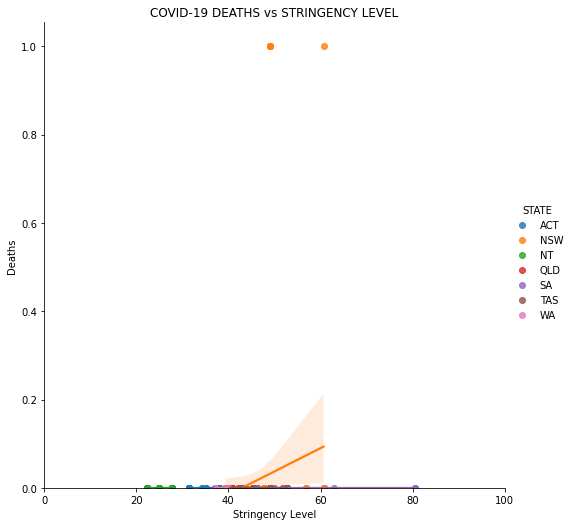

In [56]:
fig = sns.lmplot(data=NoVic, x='STRINGENCY_LEVEL', y='DEATHS', height = 7, hue = 'STATE')
fig.set(xlabel = "Stringency Level", ylabel = "Deaths", title = "COVID-19 DEATHS vs STRINGENCY LEVEL")
plt.ylim(0,None)
plt.xlim(0,100)

Thus we can see that it is probably worth taking a closer look at the VIC (cases, deaths) and NSW (cases) datasets. 

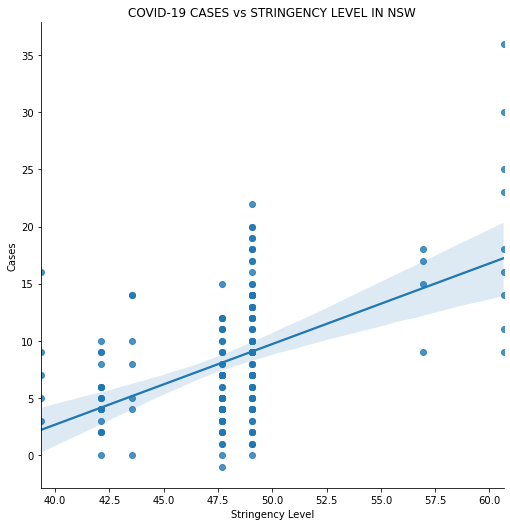

In [57]:
fig = sns.lmplot(data=NSWData, x='STRINGENCY_LEVEL', y='CASES', height = 7)
fig.set(xlabel = "Stringency Level", ylabel = "Cases", title = "COVID-19 CASES vs STRINGENCY LEVEL IN NSW")

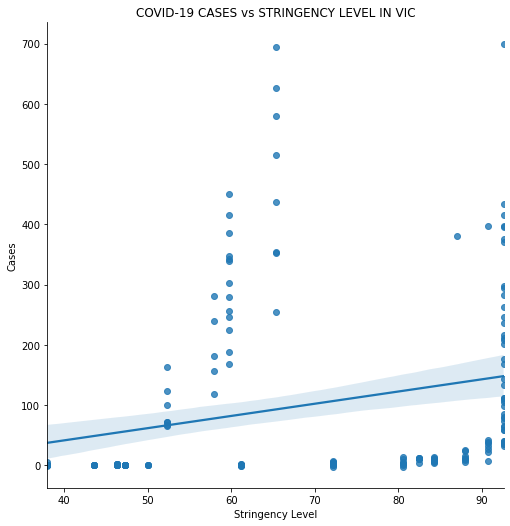

In [58]:
fig = sns.lmplot(data=VICData, x='STRINGENCY_LEVEL', y='CASES', height = 7)
fig.set(xlabel = "Stringency Level", ylabel = "Cases", title = "COVID-19 CASES vs STRINGENCY LEVEL IN VIC")

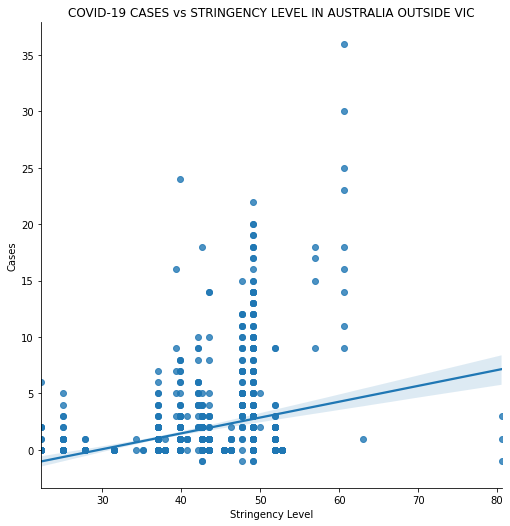

In [59]:
fig = sns.lmplot(data=NoVic, x='STRINGENCY_LEVEL', y='CASES', height = 7)
fig.set(xlabel = "Stringency Level", ylabel = "Cases", title = "COVID-19 CASES vs STRINGENCY LEVEL IN AUSTRALIA OUTSIDE VIC")

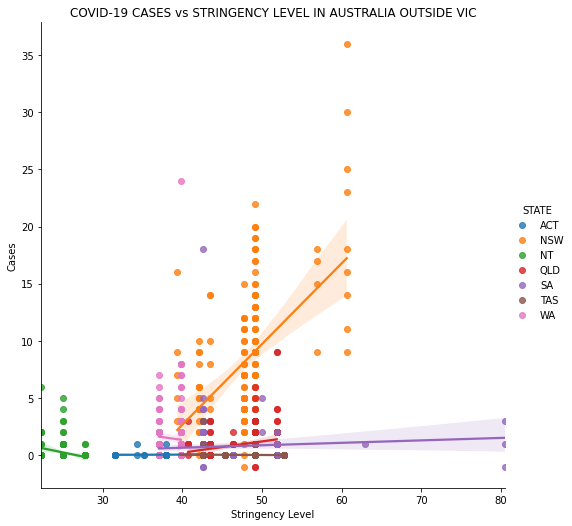

In [60]:
fig = sns.lmplot(data=NoVic, x='STRINGENCY_LEVEL', y='CASES', height = 7, hue = 'STATE')
fig.set(xlabel = "Stringency Level", ylabel = "Cases", title = "COVID-19 CASES vs STRINGENCY LEVEL IN AUSTRALIA OUTSIDE VIC")

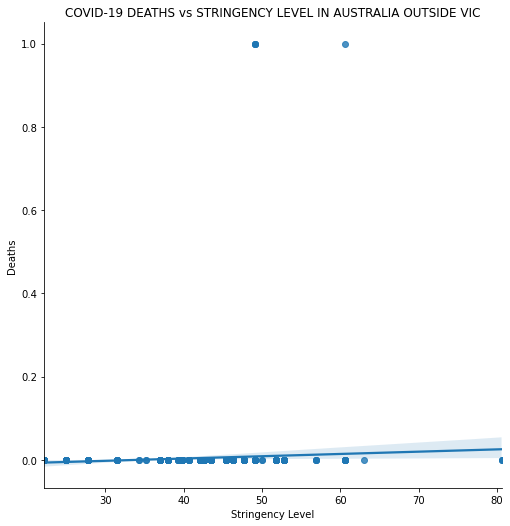

In [61]:
fig = sns.lmplot(data=NoVic, x='STRINGENCY_LEVEL', y='DEATHS', height = 7)
fig.set(xlabel = "Stringency Level", ylabel = "Deaths", title = "COVID-19 DEATHS vs STRINGENCY LEVEL IN AUSTRALIA OUTSIDE VIC")

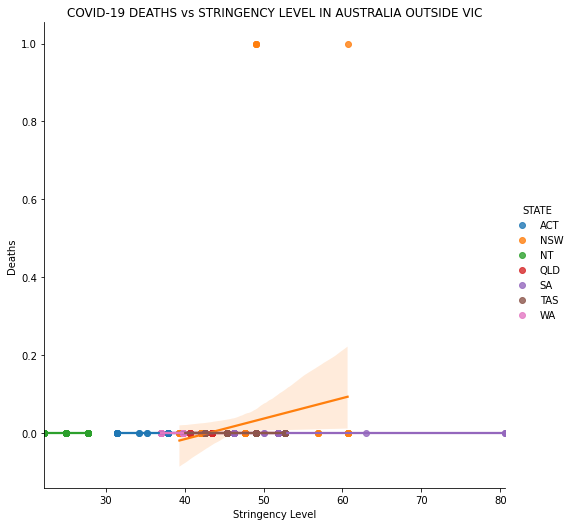

In [62]:
fig = sns.lmplot(data=NoVic, x='STRINGENCY_LEVEL', y='DEATHS', height = 7, hue = 'STATE')
fig.set(xlabel = "Stringency Level", ylabel = "Deaths", title = "COVID-19 DEATHS vs STRINGENCY LEVEL IN AUSTRALIA OUTSIDE VIC")

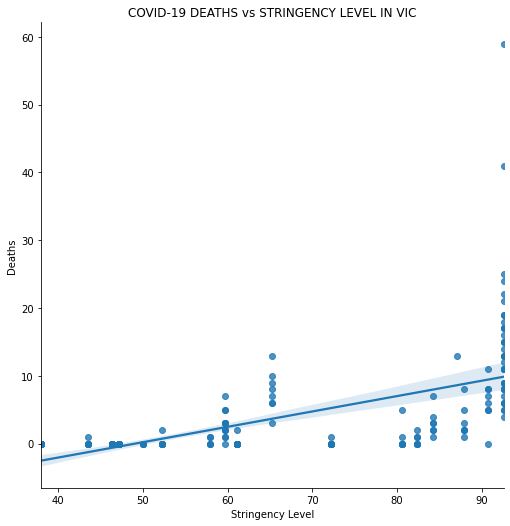

In [63]:
fig = sns.lmplot(data=VICData, x='STRINGENCY_LEVEL', y='DEATHS', height = 7)
fig.set(xlabel = "Stringency Level", ylabel = "Deaths", title = "COVID-19 DEATHS vs STRINGENCY LEVEL IN VIC")

Upon further exploration and visualisation of the data, it became clear that the focus should be VIC.

Now we will look at the effects of stringency levels on Victorian covid cases. 

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'COVID-19 CASES IN VICTORIA JULY-DECEMBER 2020')]

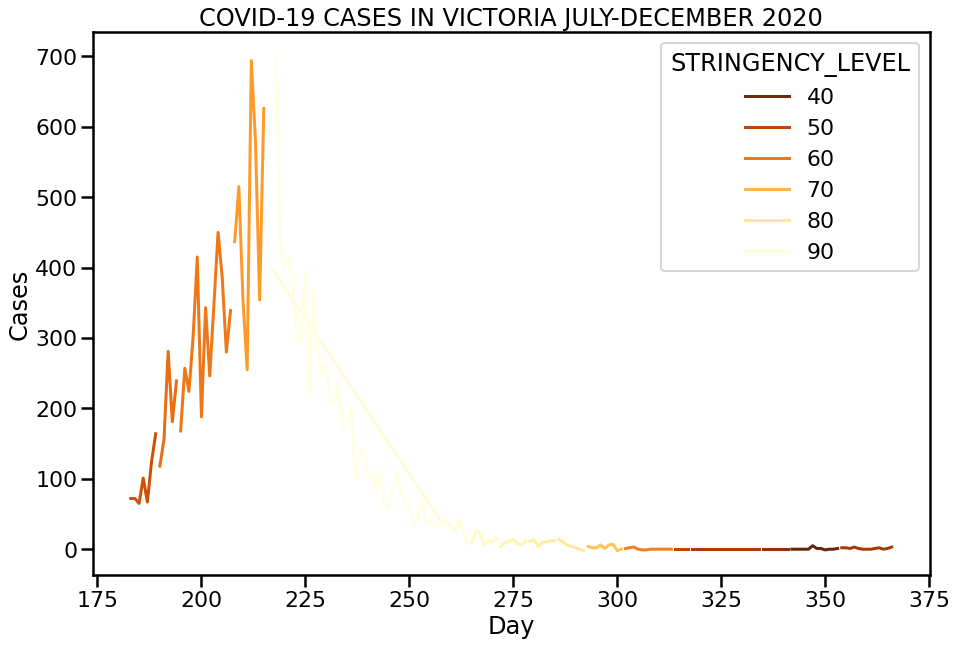

In [64]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = VICData, x = 'DAY', y = 'CASES', hue = 'STRINGENCY_LEVEL', palette = 'YlOrBr_r')
fig.set(xlabel = "Day", ylabel = "Cases", title = "COVID-19 CASES IN VICTORIA JULY-DECEMBER 2020")

Observing the effects of lockdown stringency on Victorian covid cases, the hypothesis was proven right. An increase in stringency levels as a response to increasing covid case numbers will gradually work to bring the number of covid cases down. However, the effects of the increased stringency levels does take some time - approximately 50 days. 


[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Deaths'),
 Text(0.5, 1.0, 'COVID-19 DEATHS IN VICTORIA JULY-DECEMBER 2020')]

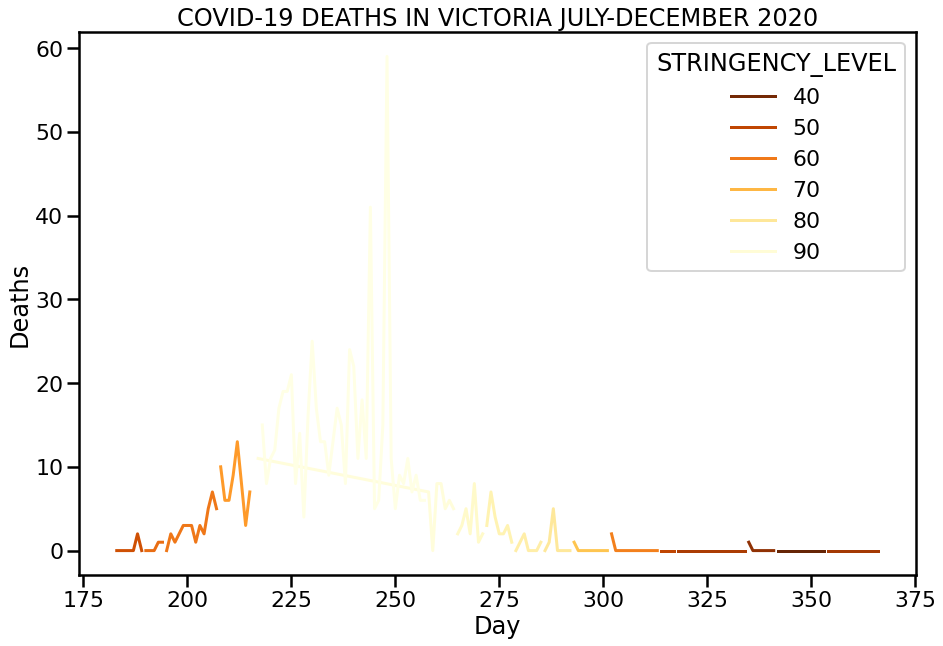

In [65]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = VICData, x = 'DAY', y = 'DEATHS', hue = 'STRINGENCY_LEVEL', palette = 'YlOrBr_r')
fig.set(xlabel = "Day", ylabel = "Deaths", title = "COVID-19 DEATHS IN VICTORIA JULY-DECEMBER 2020")

The plot of covid deaths across time while factoring in lockdown stringency level also tells a similar story. However, it is important to note that the onset between a covid infection and subsequent death does take a few weeks, which is why there is a lag in the lockdown stringency level working. At first, the deaths appear to spike even with the increased stringency level, but the deaths do eventually get brought down, and only then does the stringency level lower. 


[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'COVID-19 CASES IN NSW JULY-DECEMBER 2020')]

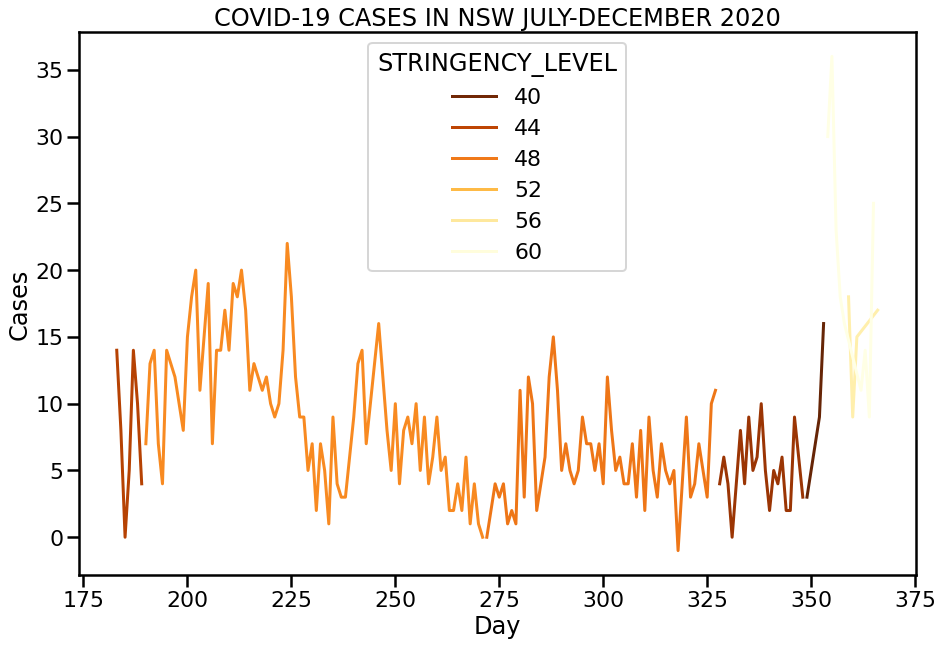

In [66]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = NSWData, x = 'DAY', y = 'CASES', hue = 'STRINGENCY_LEVEL', palette = 'YlOrBr_r')
fig.set(xlabel = "Day", ylabel = "Cases", title = "COVID-19 CASES IN NSW JULY-DECEMBER 2020")

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'COVID-19 CASES IN SA JULY-DECEMBER 2020')]

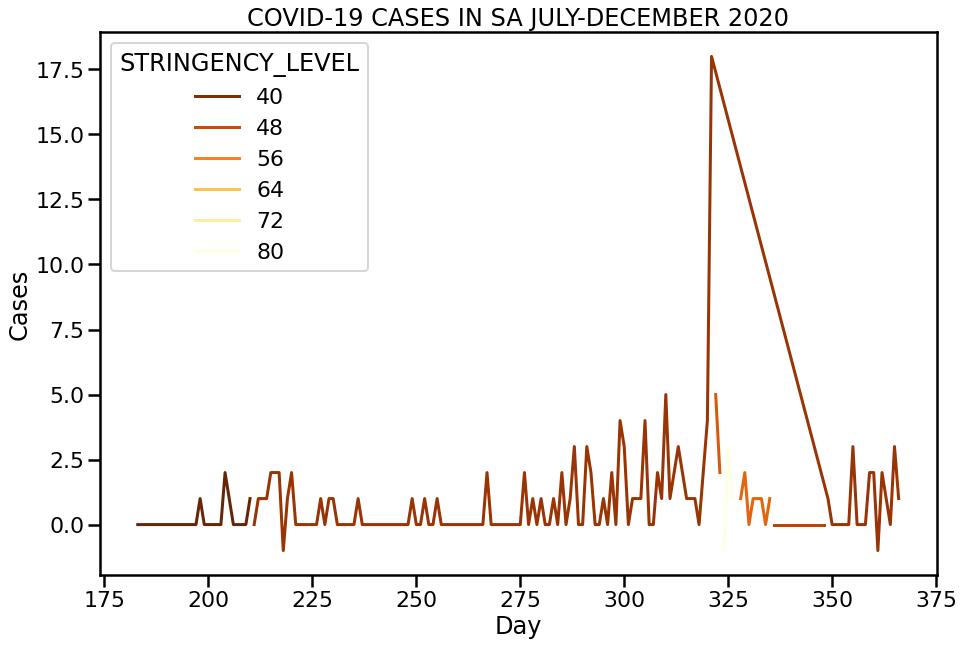

In [67]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = SAData, x = 'DAY', y = 'CASES', hue = 'STRINGENCY_LEVEL', palette = 'YlOrBr_r')
fig.set(xlabel = "Day", ylabel = "Cases", title = "COVID-19 CASES IN SA JULY-DECEMBER 2020")

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Cases'),
 Text(0.5, 1.0, 'COVID-19 CASES IN AUSTRALIA OUTSIDE VICTORIA JULY-DECEMBER 2020')]

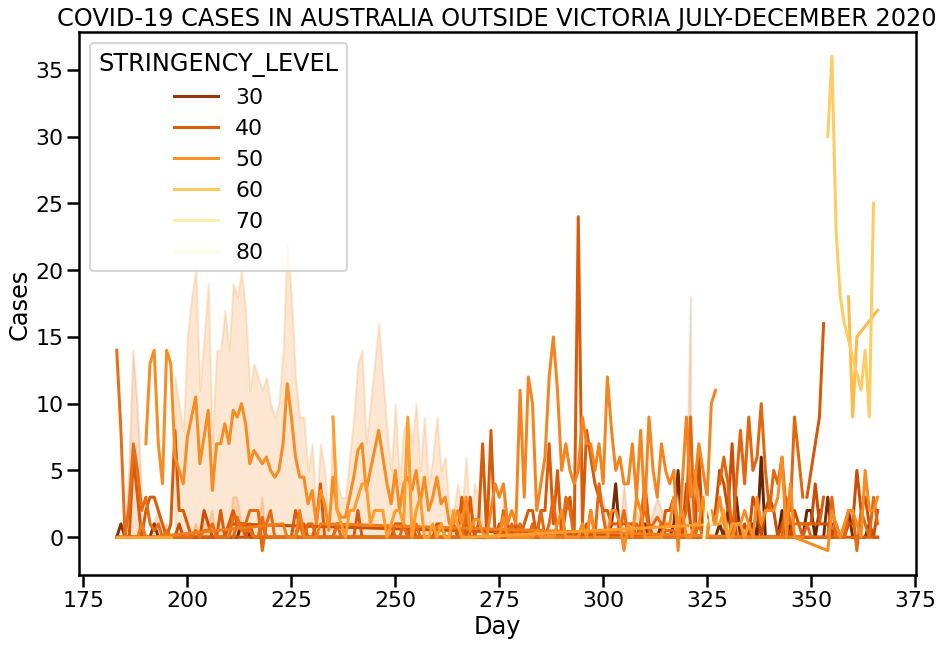

In [68]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = NoVic, x = 'DAY', y = 'CASES', hue = 'STRINGENCY_LEVEL', palette = 'YlOrBr_r')
fig.set(xlabel = "Day", ylabel = "Cases", title = "COVID-19 CASES IN AUSTRALIA OUTSIDE VICTORIA JULY-DECEMBER 2020")

[Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Deaths'),
 Text(0.5, 1.0, 'COVID-19 DEATHS IN AUSTRALIA OUTSIDE VICTORIA JULY-DECEMBER 2020')]

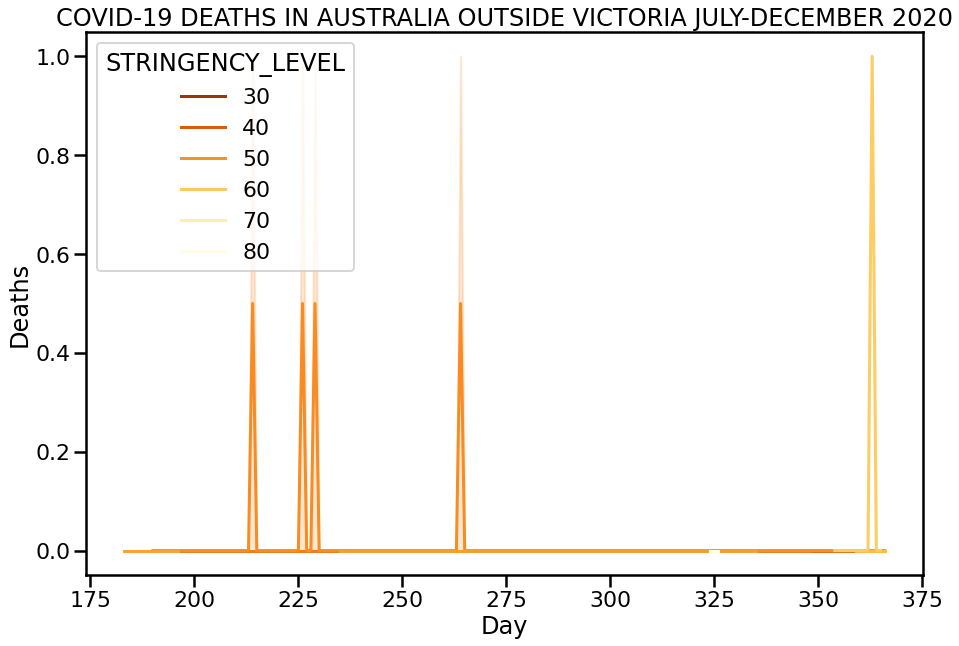

In [69]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = NoVic, x = 'DAY', y = 'DEATHS', hue = 'STRINGENCY_LEVEL', palette = 'YlOrBr_r')
fig.set(xlabel = "Day", ylabel = "Deaths", title = "COVID-19 DEATHS IN AUSTRALIA OUTSIDE VICTORIA JULY-DECEMBER 2020")

### Analysis Summary
By splitting up the totalData into state by state analysis, the effect that different stringency levels had on the case numbers was more clearly seen.

Looking at Victoria, the highest strigency level was able to have the most effect on bringing down case numbers.

# Linear Regression Model
As we can see from the graphs above, there is no clear linear relationship between Stringency_Level and daily cases. This likely occurs for two reasons:
1. Stringency level comes up in response to an increase of cases, but cases also come down in response to an increased stringency level
2. The effect of an increased stringency level is longer term, rather than day to day (i.e. an increased stringency level does not take effect immediately)

As a result of this, passing cases and stringency level into a linear regression model will likely not provide accurate results.

In order to account for the longer term nature of the relationship between stringency level and cases, the linear regression model will be run multiple times with different representations of case numbers:
1. Firstly, with just the daily cases, attempting to establish a relationship between the daily case numbers and the daily stringency level.
2. Then, averaging the case numbers over a 7 day bracket, smoothing out the data and somewhat accounting for longer term changes.
3. Lastly, with a 14 day bracket. 

After running the model with these three representations of case numbers, the accuracy scores will be compared to analyse if the relationship between stringency level and case numbers becomes any more linear when a longer time period is considered.

In [70]:
totalData["7DCASES"] = totalData["CASES"].rolling(7).sum()
totalData["14DCASES"] = totalData["CASES"].rolling(14).sum()

In [71]:
totalDataLR = totalData.drop(["STATE", "DATE"], axis = 1)

In [72]:
def linearPredict(totalDataLR, x, y):
    totalDataLR = totalDataLR.dropna()
    train, test = train_test_split(totalDataLR, test_size=0.2, random_state=142)
    x_train = train[[x]]
    y_train = train[y]
    x_test = test[[x]]
    y_test = test[y]
    reg = linear_model.LinearRegression()
    reg.fit(x_train, y_train)
    train_preds = reg.predict(x_train)
    print("TRAIN SET EVALUATION")
    print("MSE: ", mean_squared_error(y_train, train_preds))
    print("R Squared: ", r2_score(y_train, train_preds))
    print("\n TEST SET EVALUATION")
    test_preds = reg.predict(x_test)
    print("MSE: ", mean_squared_error(y_test, test_preds))
    print("R Squared: ", r2_score(y_test, test_preds))

In [73]:
print("*** Daily Cases ***")
linearPredict(totalDataLR, 'STRINGENCY_LEVEL', 'CASES')
print("\n*** 7 Day Average Cases ***")
linearPredict(totalDataLR, 'STRINGENCY_LEVEL', '7DCASES')
print("\n*** 14 Day Average Cases ***")
linearPredict(totalDataLR, 'STRINGENCY_LEVEL', '14DCASES')

*** Daily Cases ***
TRAIN SET EVALUATION
MSE:  3618.306141358391
R Squared:  0.20730293944079892

 TEST SET EVALUATION
MSE:  1574.9513593374352
R Squared:  0.1361681842860356

*** 7 Day Average Cases ***
TRAIN SET EVALUATION
MSE:  150470.4793129541
R Squared:  0.25991453584713897

 TEST SET EVALUATION
MSE:  80770.86387722376
R Squared:  0.22044218819091344

*** 14 Day Average Cases ***
TRAIN SET EVALUATION
MSE:  538147.5131875814
R Squared:  0.3043312657144335

 TEST SET EVALUATION
MSE:  320595.73485244624
R Squared:  0.3064053702908087


In [74]:
VICData["7DCASES"] = VICData["CASES"].rolling(7).sum()
VICData["14DCASES"] = VICData["CASES"].rolling(14).sum()
VICDataLR = VICData.drop(["STATE", "DATE"], axis = 1)
VICDataLR

<ipython-input-74-69319f76570d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VICData["7DCASES"] = VICData["CASES"].rolling(7).sum()
<ipython-input-74-69319f76570d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VICData["14DCASES"] = VICData["CASES"].rolling(14).sum()


,index,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS,7DCASES,14DCASES
1104,184,52.31,6648600.0,72,0,183,7,2231,20,NaN,NaN
1105,185,52.31,6648600.0,72,0,184,7,2303,20,NaN,NaN
1106,186,52.31,6648600.0,65,0,185,7,2368,20,NaN,NaN
1107,187,52.31,6648600.0,101,0,186,7,2469,20,NaN,NaN
1108,188,52.31,6648600.0,67,0,187,7,2536,20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1283,363,46.30,6648600.0,1,0,362,12,20362,823,6.0,11.0
1284,364,46.30,6648600.0,2,0,363,12,20364,823,7.0,12.0
1285,365,46.30,6648600.0,0,0,364,12,20364,823,4.0,13.0
1286,366,46.30,6648600.0,1,0,365,12,20365,823,4.0,14.0


In [75]:
print("*** Daily Victorian Cases ***")
linearPredict(VICDataLR, 'STRINGENCY_LEVEL', 'CASES')
print("*** \n7 Day Average Victorian Cases ***")
linearPredict(VICDataLR, 'STRINGENCY_LEVEL', '7DCASES')
print("*** \n14 Day Average Victorian Cases ***")
linearPredict(VICDataLR, 'STRINGENCY_LEVEL', '14DCASES')

*** Daily Victorian Cases ***
TRAIN SET EVALUATION
MSE:  20833.268748063332
R Squared:  0.10714377485032256

 TEST SET EVALUATION
MSE:  31577.44964895663
R Squared:  -0.03685153101432048
*** 
7 Day Average Victorian Cases ***
TRAIN SET EVALUATION
MSE:  971254.6884877529
R Squared:  0.15872064012734077

 TEST SET EVALUATION
MSE:  939421.6827578464
R Squared:  0.01262987491224199
*** 
14 Day Average Victorian Cases ***
TRAIN SET EVALUATION
MSE:  3461733.278746747
R Squared:  0.23272544786933524

 TEST SET EVALUATION
MSE:  3051808.277164879
R Squared:  0.06622961164356034


In [76]:
VICData["7DDEATHS"] = VICData["DEATHS"].rolling(7).sum()
VICData["14DDEATHS"] = VICData["DEATHS"].rolling(14).sum()
VICDataLR1 = VICData.drop(["STATE", "DATE"], axis = 1)
VICDataLR1

<ipython-input-76-f9a0180cc801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VICData["7DDEATHS"] = VICData["DEATHS"].rolling(7).sum()
<ipython-input-76-f9a0180cc801>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VICData["14DDEATHS"] = VICData["DEATHS"].rolling(14).sum()


,index,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS,7DCASES,14DCASES,7DDEATHS,14DDEATHS
1104,184,52.31,6648600.0,72,0,183,7,2231,20,NaN,NaN,NaN,NaN
1105,185,52.31,6648600.0,72,0,184,7,2303,20,NaN,NaN,NaN,NaN
1106,186,52.31,6648600.0,65,0,185,7,2368,20,NaN,NaN,NaN,NaN
1107,187,52.31,6648600.0,101,0,186,7,2469,20,NaN,NaN,NaN,NaN
1108,188,52.31,6648600.0,67,0,187,7,2536,20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,363,46.30,6648600.0,1,0,362,12,20362,823,6.0,11.0,0.0,0.0
1284,364,46.30,6648600.0,2,0,363,12,20364,823,7.0,12.0,0.0,0.0
1285,365,46.30,6648600.0,0,0,364,12,20364,823,4.0,13.0,0.0,0.0
1286,366,46.30,6648600.0,1,0,365,12,20365,823,4.0,14.0,0.0,0.0


In [77]:
print("*** Daily Victorian Deaths ***")
linearPredict(VICDataLR1, 'STRINGENCY_LEVEL', 'DEATHS')
print("*** \n7 Day Average Victorian Deaths ***")
linearPredict(VICDataLR1, 'STRINGENCY_LEVEL', '7DDEATHS')
print("*** \n14 Day Average Victorian Deaths ***")
linearPredict(VICDataLR1, 'STRINGENCY_LEVEL', '14DDEATHS')

*** Daily Victorian Deaths ***
TRAIN SET EVALUATION
MSE:  45.43473746615659
R Squared:  0.3227914922939916

 TEST SET EVALUATION
MSE:  15.198632627322516
R Squared:  0.4227591936358255
*** 
7 Day Average Victorian Deaths ***
TRAIN SET EVALUATION
MSE:  865.6004978454667
R Squared:  0.563902375820917

 TEST SET EVALUATION
MSE:  462.7651345234024
R Squared:  0.5798531863457244
*** 
14 Day Average Victorian Deaths ***
TRAIN SET EVALUATION
MSE:  2613.716866969825
R Squared:  0.629227919569423

 TEST SET EVALUATION
MSE:  1632.8095786339588
R Squared:  0.7160841460364888


In [78]:
NSWData["7DCASES"] = NSWData["CASES"].rolling(7).sum()
NSWData["14DCASES"] = NSWData["CASES"].rolling(14).sum()
NSWDataLR = NSWData.drop(["STATE", "DATE"], axis = 1)
NSWDataLR

<ipython-input-78-5d364b65dbd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NSWData["7DCASES"] = NSWData["CASES"].rolling(7).sum()
<ipython-input-78-5d364b65dbd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NSWData["14DCASES"] = NSWData["CASES"].rolling(14).sum()


,index,STRINGENCY_LEVEL,POPULATION,CASES,DEATHS,DAY,MONTH,CUM_CASES,CUM_DEATHS,7DCASES,14DCASES
184,0,43.52,8176400.0,14,0,183,7,3392,50,NaN,NaN
185,1,43.52,8176400.0,8,0,184,7,3400,50,NaN,NaN
186,2,43.52,8176400.0,0,0,185,7,3400,50,NaN,NaN
187,3,43.52,8176400.0,5,0,186,7,3405,50,NaN,NaN
188,4,43.52,8176400.0,14,0,187,7,3419,50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
363,179,60.65,8176400.0,11,0,362,12,4858,54,110.0,216.0
364,180,60.65,8176400.0,14,1,363,12,4872,55,101.0,227.0
365,181,60.65,8176400.0,9,0,364,12,4881,55,92.0,231.0
366,182,60.65,8176400.0,25,0,365,12,4906,55,101.0,249.0


In [79]:
print("*** Daily NSW Cases ***")
linearPredict(NSWDataLR, 'STRINGENCY_LEVEL', 'CASES')
print("*** \n7 Day Average NSW Cases ***")
linearPredict(NSWDataLR, 'STRINGENCY_LEVEL', '7DCASES')
print("*** \n14 Day Average NSW Cases ***")
linearPredict(NSWDataLR, 'STRINGENCY_LEVEL', '14DCASES')

*** Daily NSW Cases ***
TRAIN SET EVALUATION
MSE:  26.4001926653539
R Squared:  0.26484068439750597

 TEST SET EVALUATION
MSE:  20.12069047841571
R Squared:  0.2557118662864102
*** 
7 Day Average NSW Cases ***
TRAIN SET EVALUATION
MSE:  631.2136251706523
R Squared:  0.37987816050816503

 TEST SET EVALUATION
MSE:  580.3155640104766
R Squared:  0.2726193504786193
*** 
14 Day Average NSW Cases ***
TRAIN SET EVALUATION
MSE:  1923.2504701808855
R Squared:  0.3249531675179038

 TEST SET EVALUATION
MSE:  1746.7730821270854
R Squared:  0.32514057469236435


### Analysis of Linear Regression Model
As seen through running the linear regression model, looking at the data in the longer term gives a much higher mean squared error and a higher r squared value. This means that there is far more variance between the actual and predicted values from the model, but more of this variance is explained by the model. 

Through this analysis we can see that the method used did not actually produce a better model. This is likely because the relationship between stringency level and cases is not linear. 

No handles with labels found to put in legend.


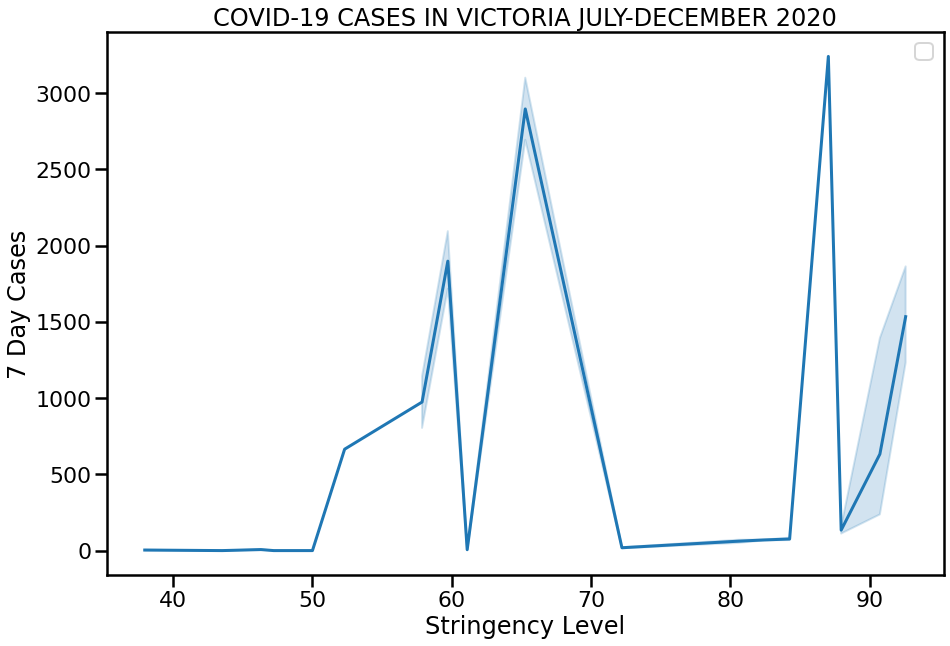

In [80]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = VICData, x = 'STRINGENCY_LEVEL', y = '7DCASES')
fig.set(xlabel = "Stringency Level", ylabel = "7 Day Cases", title = "COVID-19 CASES IN VICTORIA JULY-DECEMBER 2020")
fig.legend()

No handles with labels found to put in legend.


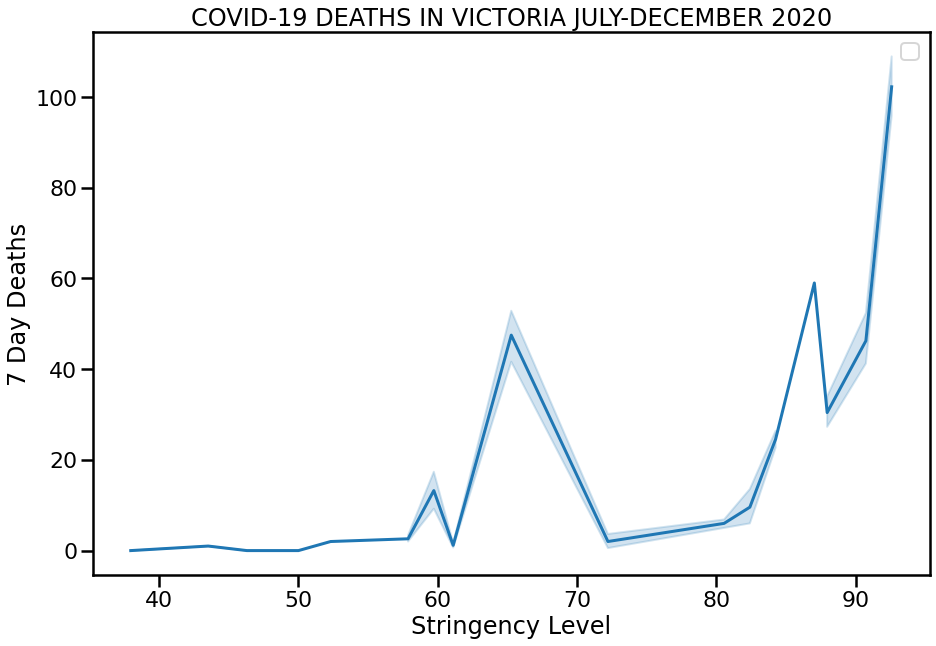

In [81]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = VICData, x = 'STRINGENCY_LEVEL', y = '7DDEATHS')
fig.set(xlabel = "Stringency Level", ylabel = "7 Day Deaths", title = "COVID-19 DEATHS IN VICTORIA JULY-DECEMBER 2020")
fig.legend()

No handles with labels found to put in legend.


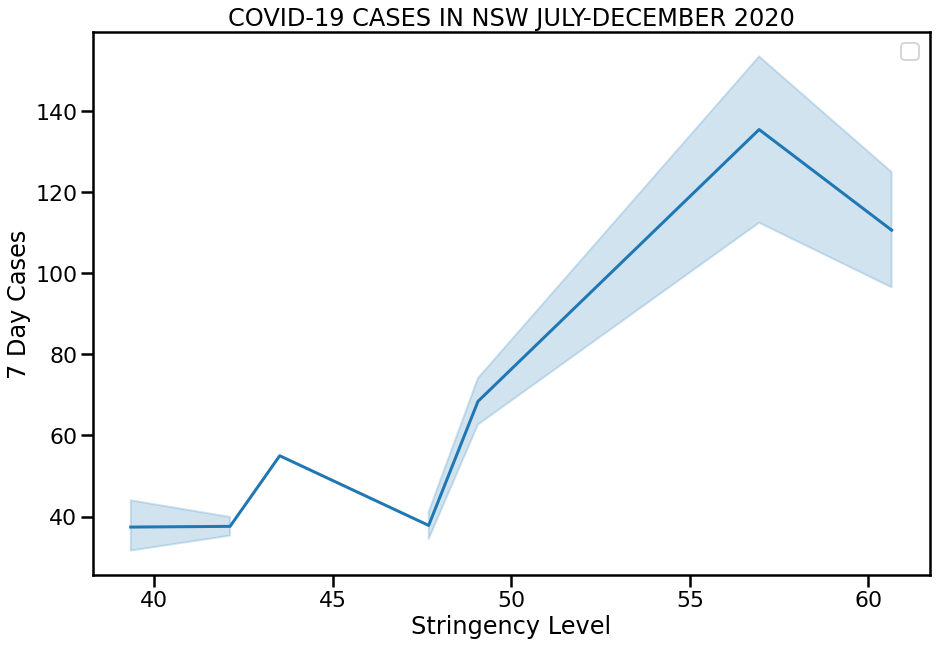

In [82]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = NSWData, x = 'STRINGENCY_LEVEL', y = '7DCASES')
fig.set(xlabel = "Stringency Level", ylabel = "7 Day Cases", title = "COVID-19 CASES IN NSW JULY-DECEMBER 2020")
fig.legend()

No handles with labels found to put in legend.


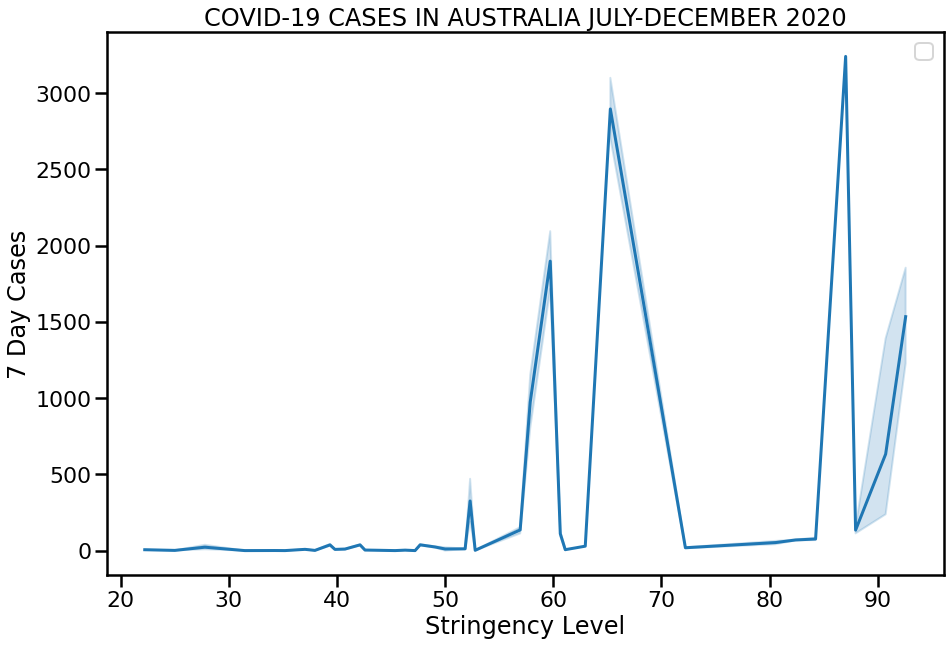

In [83]:
plt.figure(figsize=(15, 10))
sns.set_context("poster")
fig = sns.lineplot(data = totalData, x = 'STRINGENCY_LEVEL', y = '7DCASES')
fig.set(xlabel = "Stringency Level", ylabel = "7 Day Cases", title = "COVID-19 CASES IN AUSTRALIA JULY-DECEMBER 2020")
fig.legend()

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.cm import inferno
from matplotlib.cm import magma
from matplotlib.colors import to_hex
import seaborn as sns

import json #possible install
import ipywidgets as widgets

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [85]:
strinData = pd.read_csv("files/StringencyData.csv")

In [86]:
strinData.columns = ["DATE", "NSW", "VIC", "QLD", "SA", "WA", "TAS","NT", "ACT"]
strinData = strinData.drop([184, 185])
strinData

,DATE,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,01/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,37.96
1,02/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,37.96
2,03/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,43.52
3,04/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,43.52
4,05/07/2020,43.52,52.31,46.30,37.04,39.81,52.78,27.78,43.52
...,...,...,...,...,...,...,...,...,...
179,27/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81
180,28/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81
181,29/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81
182,30/12/2020,60.65,46.30,49.07,42.59,37.04,39.81,25.00,39.81


### Size of StrinData

In [87]:
print(strinData.shape)

(184, 9)


#### Statistical Summary of the Dataframe

In [88]:
strinData.describe()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,48.120163,68.288641,48.015598,43.220489,39.087391,46.393913,24.969783,41.677011
std,4.112292,19.497351,3.011755,5.961698,1.219650,3.910830,1.197898,3.242312
min,39.350000,37.960000,40.740000,37.040000,37.040000,39.810000,22.220000,31.480000
25%,47.690000,47.220000,46.300000,42.590000,37.040000,42.590000,25.000000,39.810000
50%,49.070000,65.280000,49.070000,42.590000,39.810000,49.070000,25.000000,43.520000
75%,49.070000,90.740000,49.070000,42.590000,39.810000,49.070000,25.000000,43.520000
max,60.650000,92.590000,51.850000,80.560000,39.810000,52.780000,27.780000,43.520000


### Overall data for all states according to date 

In [89]:
State = pd.melt(strinData, id_vars = ['DATE'], var_name = ['State'])
State

,DATE,State,value
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


### Basic description on overall state dataset

In [90]:
State.describe()

,value
count,1472.000000
mean,44.971624
std,13.612285
min,22.220000
25%,39.810000
50%,43.520000
75%,49.070000
max,92.590000


In [91]:
print(State.shape)

(1472, 3)


In [92]:
# Split data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(State, test_size=0.2, random_state= 39)
print(train.shape)
print(test.shape)

(1177, 3)
(295, 3)


In [93]:
# Build Logistic Regression model
X_train = train.drop(['State', 'DATE'], axis = 1)
y_train = train['State']
X_test = test.drop(['State', 'DATE'], axis = 1)
y_test = test['State']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape: (1177, 1)
y_train shape: (1177,)
X_test shape: (295, 1)
y_test shape: (295,)
     value
329  47.22
761  39.81
660  42.59
357  46.30
791  39.81
329    VIC
761     WA
660     SA
357    VIC
791     WA
Name: State, dtype: object


In [94]:
# Training Logistic Regression model
model = LogisticRegression() ## initialise model
model.fit(X_train, y_train) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
# Do predictions on test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
print(y_hat_train)
print(y_test)

['NSW' 'WA' 'SA' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
880      WA
661      SA
327     VIC
760      WA
822      WA
Name: State, Length: 295, dtype: object


In [96]:
# Evaluate the performance of trained model for State
print("Accuracy score on training set:", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set:", accuracy_score(y_test, y_hat_test))

Accuracy score on training set: 0.5284621920135939
Accuracy score on testing set: 0.511864406779661


In [97]:
# Checking confusion matrix for State
print("Confusion matrix on test set:")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 26  0  0 10  4  0  0]
 [ 0  1  0  0 18  3  1  3]
 [ 0 22  0  0  9  1  0  5]
 [ 0  6  0  0  2  2 29  4]
 [ 0  0  0  0  0  0  0 39]]


# creating RFE project


In [ ]:
lr_model = LogisticRegression()
rfe = RFE(estimator = lr_model, n_features_to_select=5, step =1)
rfe.fit(X_train, y_train)

In [98]:
# Training Logistic Regression model
model = LogisticRegression() ## initialise model
model.fit(X_train, y_train) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [99]:
# Do predictions on test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
print(y_hat_train)
print(y_test)

['NSW' 'WA' 'SA' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
880      WA
661      SA
327     VIC
760      WA
822      WA
Name: State, Length: 295, dtype: object


### Evaluation
Evaluating the Covid Confirmed Dataframe to look at how many cases were correctly clasified and how many of them were in error by testing on accuracy.
The function [accuracy_score]() provides the number from 0-1 for proportion accuracy rate. The function [confusion_matrix]() finds out how many dataframes have been classified correctly, and why and where errors existed.

In [100]:
# Evaluate the performance of trained model
print("Accuracy score on training set:", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set:", accuracy_score(y_test, y_hat_test))

Accuracy score on training set: 0.5284621920135939
Accuracy score on testing set: 0.511864406779661


In [101]:
# Checking confusion matrix
print("Confusion matrix on test set:")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 26  0  0 10  4  0  0]
 [ 0  1  0  0 18  3  1  3]
 [ 0 22  0  0  9  1  0  5]
 [ 0  6  0  0  2  2 29  4]
 [ 0  0  0  0  0  0  0 39]]


#### Does not have enough features for doing the RFE feature selection 

### Data for NSW confirmed cases due to date

In [102]:
NSW = pd.melt(strinData, id_vars = ['DATE'], var_name = ['NSW'])
NSW

,DATE,NSW,value
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


In [103]:
print(NSW.shape)

(1472, 3)


In [104]:
NSW.describe()

,value
count,1472.000000
mean,44.971624
std,13.612285
min,22.220000
25%,39.810000
50%,43.520000
75%,49.070000
max,92.590000


In [105]:
# Split data into training(80%) and testing data (20%) and use random_state=39
train, test = train_test_split(NSW, test_size=0.202, random_state= 39)
print(train.shape)
print(test.shape)

(1174, 3)
(298, 3)


In [106]:
# Build Logistic Regression model
X_trainN = train.drop(['NSW', 'DATE'], axis = 1)
y_trainN = train['NSW']
X_testN = test.drop(['NSW', 'DATE'], axis = 1)
y_testN = test['NSW']

print("X_train shape:", X_trainN.shape)
print("y_train shape:", y_trainN.shape)
print("X_test shape:", X_testN.shape)
print("y_test shape:", y_testN.shape)
print(X_trainN.head())
print(y_trainN.head())

X_train shape: (1174, 1)
y_train shape: (1174,)
X_test shape: (298, 1)
y_test shape: (298,)
      value
357   46.30
791   39.81
1286  25.00
1225  25.00
1182  25.00
357     VIC
791      WA
1286     NT
1225     NT
1182     NT
Name: NSW, dtype: object


In [107]:
# Training Logistic Regression model
model = LogisticRegression() ## initialise model
model.fit(X_trainN, y_trainN) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
# Do predictions on test set
y_hat_trainN = model.predict(X_trainN)
y_hat_testN = model.predict(X_testN)
print(y_hat_trainN)
print(y_testN)

['TAS' 'WA' 'NT' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
760      WA
822      WA
329     VIC
761      WA
660      SA
Name: NSW, Length: 298, dtype: object


In [109]:
# NSW Accuracy score
print("Accuracy score on training set:", accuracy_score(y_trainN, y_hat_trainN))
print("Accuracy score on testing set:", accuracy_score(y_testN, y_hat_testN))

Accuracy score on training set: 0.5502555366269165
Accuracy score on testing set: 0.540268456375839


In [110]:
# Confusion matrix for NSW
print("Confusion matrix on test set:")
print(confusion_matrix(y_testN, y_hat_testN))

Confusion matrix on test set:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 18  0  8 10  4  0  0]
 [ 0  1  0  0 19  3  1  3]
 [ 0 18  0  4  9  1  0  5]
 [ 0  6  0  1  2  2 29  4]
 [ 0  0  0  0  0  0  0 40]]


### Data for VIC confirmed cases due to date

In [111]:
VIC = pd.melt(strinData, id_vars = ['DATE'], var_name = ['VIC'])
VIC

,DATE,VIC,value
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


In [112]:
VIC.describe()

,value
count,1472.000000
mean,44.971624
std,13.612285
min,22.220000
25%,39.810000
50%,43.520000
75%,49.070000
max,92.590000


In [113]:
# Split data into training(80%) and testing data (20%) and use random_state=39
train, test = train_test_split(VIC, test_size=0.202, random_state= 39)
print(train.shape)
print(test.shape)

(1174, 3)
(298, 3)


In [114]:
# Build Logistic Regression model for Victoria
X_trainV = train.drop(['VIC', 'DATE'], axis = 1)
y_trainV = train['VIC']
X_testV = test.drop(['VIC', 'DATE'], axis = 1)
y_testV = test['VIC']

print("X_train shape:", X_trainV.shape)
print("y_train shape:", y_trainV.shape)
print("X_test shape:", X_testV.shape)
print("y_test shape:", y_testV.shape)
print(X_trainV.head())
print(y_trainV.head())

X_train shape: (1174, 1)
y_train shape: (1174,)
X_test shape: (298, 1)
y_test shape: (298,)
      value
357   46.30
791   39.81
1286  25.00
1225  25.00
1182  25.00
357     VIC
791      WA
1286     NT
1225     NT
1182     NT
Name: VIC, dtype: object


In [115]:
# Training Logistic Regression model
model = LogisticRegression() ## initialise model
model.fit(X_trainV, y_trainV) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
# Do predictions on test set for Victoria
y_hat_trainV = model.predict(X_trainV)
y_hat_testV = model.predict(X_testV)
print(y_hat_trainV)
print(y_testV)

['TAS' 'WA' 'NT' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
760      WA
822      WA
329     VIC
761      WA
660      SA
Name: VIC, Length: 298, dtype: object


In [117]:
# Victoria Accuracy score
print("Accuracy score on training set:", accuracy_score(y_trainV, y_hat_trainV))
print("Accuracy score on testing set:", accuracy_score(y_testV, y_hat_testV))

Accuracy score on training set: 0.5502555366269165
Accuracy score on testing set: 0.540268456375839


In [118]:
# confusion matrix for Victoria
print("Confusion matrix on test set for Victoria is:")
print(confusion_matrix(y_testV, y_hat_testV))

Confusion matrix on test set for Victoria is:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 18  0  8 10  4  0  0]
 [ 0  1  0  0 19  3  1  3]
 [ 0 18  0  4  9  1  0  5]
 [ 0  6  0  1  2  2 29  4]
 [ 0  0  0  0  0  0  0 40]]


### Data for QLD confirmed cases due to date

In [119]:
QLD = pd.melt(strinData, id_vars = ['DATE'], var_name = ['QLD'])
QLD

,DATE,QLD,value
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


In [120]:
QLD.describe()

,value
count,1472.000000
mean,44.971624
std,13.612285
min,22.220000
25%,39.810000
50%,43.520000
75%,49.070000
max,92.590000


In [121]:
# Split data into training(80%) and testing data (20%) and use random_state=39
train, test = train_test_split(QLD, test_size=0.202, random_state= 39)
print(train.shape)
print(test.shape)

(1174, 3)
(298, 3)


In [122]:
# Build Logistic Regression model for Queensland
X_trainQ = train.drop(['QLD', 'DATE'], axis = 1)
y_trainQ = train['QLD']
X_testQ = test.drop(['QLD', 'DATE'], axis = 1)
y_testQ = test['QLD']

print("X_train shape:", X_trainQ.shape)
print("y_train shape:", y_trainQ.shape)
print("X_test shape:", X_testQ.shape)
print("y_test shape:", y_testQ.shape)
print(X_trainQ.head())
print(y_trainQ.head())

X_train shape: (1174, 1)
y_train shape: (1174,)
X_test shape: (298, 1)
y_test shape: (298,)
      value
357   46.30
791   39.81
1286  25.00
1225  25.00
1182  25.00
357     VIC
791      WA
1286     NT
1225     NT
1182     NT
Name: QLD, dtype: object


In [123]:
# Training Logistic Regression model for Queensland
model = LogisticRegression() ## initialise model
model.fit(X_trainV, y_trainV) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
# Do predictions on test set for Queensland
y_hat_trainQ = model.predict(X_trainQ)
y_hat_testQ = model.predict(X_testQ)
print(y_hat_trainQ)
print(y_testQ)

['TAS' 'WA' 'NT' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
760      WA
822      WA
329     VIC
761      WA
660      SA
Name: QLD, Length: 298, dtype: object


In [125]:
# Queensland Accuracy Score
print("Accuracy score on training set:", accuracy_score(y_trainQ, y_hat_trainQ))
print("Accuracy score on testing set:", accuracy_score(y_testQ, y_hat_testQ))

Accuracy score on training set: 0.5502555366269165
Accuracy score on testing set: 0.540268456375839


In [126]:
# Confusion matrix for Queensland
print("Confusion matrix on test set for Queensland is:")
print(confusion_matrix(y_testQ, y_hat_testQ))

Confusion matrix on test set for Queensland is:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 18  0  8 10  4  0  0]
 [ 0  1  0  0 19  3  1  3]
 [ 0 18  0  4  9  1  0  5]
 [ 0  6  0  1  2  2 29  4]
 [ 0  0  0  0  0  0  0 40]]


### Data for SA confirmed cases due to date

In [127]:
SA = pd.melt(strinData, id_vars = ['DATE'], var_name = ['SA'])
SA

,DATE,SA,value
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


In [128]:
SA.describe()

,value
count,1472.000000
mean,44.971624
std,13.612285
min,22.220000
25%,39.810000
50%,43.520000
75%,49.070000
max,92.590000


In [129]:
# Split data into training(80%) and testing data (20%) and use random_state=39
train, test = train_test_split(SA, test_size=0.202, random_state= 39)
print(train.shape)
print(test.shape)

(1174, 3)
(298, 3)


In [130]:
# Build Logistic Regression model for SA
X_trainSA = train.drop(['SA', 'DATE'], axis = 1)
y_trainSA = train['SA']
X_testSA = test.drop(['SA', 'DATE'], axis = 1)
y_testSA = test['SA']

print("X_train shape:", X_trainSA.shape)
print("y_train shape:", y_trainSA.shape)
print("X_test shape:", X_testSA.shape)
print("y_test shape:", y_testSA.shape)
print(X_trainSA.head())
print(y_trainSA.head())

X_train shape: (1174, 1)
y_train shape: (1174,)
X_test shape: (298, 1)
y_test shape: (298,)
      value
357   46.30
791   39.81
1286  25.00
1225  25.00
1182  25.00
357     VIC
791      WA
1286     NT
1225     NT
1182     NT
Name: SA, dtype: object


In [131]:
# Training Logistic Regression model for SA
model = LogisticRegression() ## initialise model
model.fit(X_trainSA, y_trainSA) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [132]:
# Do predictions on test set for SA
y_hat_trainSA = model.predict(X_trainSA)
y_hat_testSA = model.predict(X_testSA)
print(y_hat_trainSA)
print(y_testSA)

['TAS' 'WA' 'NT' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
760      WA
822      WA
329     VIC
761      WA
660      SA
Name: SA, Length: 298, dtype: object


In [133]:
# SA accuracy score
print("Accuracy score on training set:", accuracy_score(y_trainSA, y_hat_trainSA))
print("Accuracy score on testing set:", accuracy_score(y_testSA, y_hat_testSA))

Accuracy score on training set: 0.5502555366269165
Accuracy score on testing set: 0.540268456375839


In [134]:
# confusion matrix for SA
print("Confusion matrix on test set for SA is:")
print(confusion_matrix(y_testSA, y_hat_testSA))

Confusion matrix on test set for SA is:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 18  0  8 10  4  0  0]
 [ 0  1  0  0 19  3  1  3]
 [ 0 18  0  4  9  1  0  5]
 [ 0  6  0  1  2  2 29  4]
 [ 0  0  0  0  0  0  0 40]]


### Data for WA confirmed cases due to date

In [135]:
WA = pd.melt(strinData, id_vars = ['DATE'], var_name = ['WA'])
WA

,DATE,WA,value
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


In [136]:
WA.describe()

,value
count,1472.000000
mean,44.971624
std,13.612285
min,22.220000
25%,39.810000
50%,43.520000
75%,49.070000
max,92.590000


In [137]:
# Split your data into training(80%) and testing data (20%) and use random_state=39
train, test = train_test_split(WA, test_size=0.202, random_state= 39)
print(train.shape)
print(test.shape)

(1174, 3)
(298, 3)


In [138]:
# Build your Logistic Regression model for WA
X_trainWA = train.drop(['WA', 'DATE'], axis = 1)
y_trainWA = train['WA']
X_testWA = test.drop(['WA', 'DATE'], axis = 1)
y_testWA = test['WA']

print("X_train shape:", X_trainWA.shape)
print("y_train shape:", y_trainWA.shape)
print("X_test shape:", X_testWA.shape)
print("y_test shape:", y_testWA.shape)
print(X_trainWA.head())
print(y_trainWA.head())

X_train shape: (1174, 1)
y_train shape: (1174,)
X_test shape: (298, 1)
y_test shape: (298,)
      value
357   46.30
791   39.81
1286  25.00
1225  25.00
1182  25.00
357     VIC
791      WA
1286     NT
1225     NT
1182     NT
Name: WA, dtype: object


In [139]:
# Training Logistic Regression model for WA
model = LogisticRegression() ## initialise model
model.fit(X_trainWA, y_trainWA) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
# Do predictions on test set for WA
y_hat_trainWA = model.predict(X_trainWA)
y_hat_testWA = model.predict(X_testWA)
print(y_hat_trainWA)
print(y_testWA)

['TAS' 'WA' 'NT' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
760      WA
822      WA
329     VIC
761      WA
660      SA
Name: WA, Length: 298, dtype: object


In [141]:
# WA accuracy score
print("Accuracy score on training set:", accuracy_score(y_trainWA, y_hat_trainWA))
print("Accuracy score on testing set:", accuracy_score(y_testWA, y_hat_testWA))

Accuracy score on training set: 0.5502555366269165
Accuracy score on testing set: 0.540268456375839


In [142]:
# confusion matrix for WA
print("Confusion matrix on test set for WA is:")
print(confusion_matrix(y_testWA, y_hat_testWA))

Confusion matrix on test set for WA is:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 18  0  8 10  4  0  0]
 [ 0  1  0  0 19  3  1  3]
 [ 0 18  0  4  9  1  0  5]
 [ 0  6  0  1  2  2 29  4]
 [ 0  0  0  0  0  0  0 40]]


### Data for TAS confirmed cases due to date

In [143]:
TAS = pd.melt(strinData, id_vars = ['DATE'], var_name = ['TAS'])
TAS

,DATE,TAS,value
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


In [144]:
TAS.describe()

,value
count,1472.000000
mean,44.971624
std,13.612285
min,22.220000
25%,39.810000
50%,43.520000
75%,49.070000
max,92.590000


In [145]:
# Split data into training(80%) and testing data (20%) and use random_state=39
train, test = train_test_split(TAS, test_size=0.202, random_state= 39)
print(train.shape)
print(test.shape)

(1174, 3)
(298, 3)


In [146]:
# Build Logistic Regression model for TAS
X_trainTAS = train.drop(['TAS', 'DATE'], axis = 1)
y_trainTAS = train['TAS']
X_testTAS = test.drop(['TAS', 'DATE'], axis = 1)
y_testTAS = test['TAS']

print("X_train shape:", X_trainTAS.shape)
print("y_train shape:", y_trainTAS.shape)
print("X_test shape:", X_testTAS.shape)
print("y_test shape:", y_testTAS.shape)
print(X_trainTAS.head())
print(y_trainTAS.head())

X_train shape: (1174, 1)
y_train shape: (1174,)
X_test shape: (298, 1)
y_test shape: (298,)
      value
357   46.30
791   39.81
1286  25.00
1225  25.00
1182  25.00
357     VIC
791      WA
1286     NT
1225     NT
1182     NT
Name: TAS, dtype: object


In [147]:
# Training Logistic Regression model for TAS
model = LogisticRegression() ## initialise model
model.fit(X_trainTAS, y_trainTAS) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
# Do predictions on test set for TAS
y_hat_trainTAS = model.predict(X_trainTAS)
y_hat_testTAS = model.predict(X_testTAS)
print(y_hat_trainTAS)
print(y_testTAS)

['TAS' 'WA' 'NT' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
760      WA
822      WA
329     VIC
761      WA
660      SA
Name: TAS, Length: 298, dtype: object


In [149]:
# TAS accuracy score
print("Accuracy score on training set:", accuracy_score(y_trainTAS, y_hat_trainTAS))
print("Accuracy score on testing set:", accuracy_score(y_testTAS, y_hat_testTAS))

Accuracy score on training set: 0.5502555366269165
Accuracy score on testing set: 0.540268456375839


In [150]:
# Confusion matrix for TAS
print("Confusion matrix on test set for TAS is:")
print(confusion_matrix(y_testTAS, y_hat_testTAS))

Confusion matrix on test set for TAS is:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 18  0  8 10  4  0  0]
 [ 0  1  0  0 19  3  1  3]
 [ 0 18  0  4  9  1  0  5]
 [ 0  6  0  1  2  2 29  4]
 [ 0  0  0  0  0  0  0 40]]


### Data for NT confirmed cases due to date

In [151]:
NT = pd.melt(strinData, id_vars = ['DATE'], var_name = ['NT'])
NT

,DATE,NT,value
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


In [152]:
NT.describe()

,value
count,1472.000000
mean,44.971624
std,13.612285
min,22.220000
25%,39.810000
50%,43.520000
75%,49.070000
max,92.590000


In [153]:
# Split data into training(80%) and testing data (20%) and use random_state=39
train, test = train_test_split(NT, test_size=0.202, random_state= 39)
print(train.shape)
print(test.shape)

(1174, 3)
(298, 3)


In [154]:
# Build Logistic Regression model for NT
X_trainNT = train.drop(['NT', 'DATE'], axis = 1)
y_trainNT = train['NT']
X_testNT = test.drop(['NT', 'DATE'], axis = 1)
y_testNT = test['NT']

print("X_train shape:", X_trainNT.shape)
print("y_train shape:", y_trainNT.shape)
print("X_test shape:", X_testNT.shape)
print("y_test shape:", y_testNT.shape)
print(X_trainNT.head())
print(y_trainNT.head())

X_train shape: (1174, 1)
y_train shape: (1174,)
X_test shape: (298, 1)
y_test shape: (298,)
      value
357   46.30
791   39.81
1286  25.00
1225  25.00
1182  25.00
357     VIC
791      WA
1286     NT
1225     NT
1182     NT
Name: NT, dtype: object


In [155]:
# Training Logistic Regression model for NT
model = LogisticRegression() ## initialise model
model.fit(X_trainNT, y_trainNT) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
# Do predictions on test set for NT
y_hat_trainNT = model.predict(X_trainNT)
y_hat_testNT = model.predict(X_testNT)
print(y_hat_trainNT)
print(y_testNT)

['TAS' 'WA' 'NT' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
760      WA
822      WA
329     VIC
761      WA
660      SA
Name: NT, Length: 298, dtype: object


In [157]:
# NT accuracy score
print("Accuracy score on training set:", accuracy_score(y_trainNT, y_hat_trainNT))
print("Accuracy score on testing set:", accuracy_score(y_testNT, y_hat_testNT))

Accuracy score on training set: 0.5502555366269165
Accuracy score on testing set: 0.540268456375839


In [158]:
# Confusion matrix for NT
print("Confusion matrix on test set for NT is:")
print(confusion_matrix(y_testNT, y_hat_testNT))

Confusion matrix on test set for NT is:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 18  0  8 10  4  0  0]
 [ 0  1  0  0 19  3  1  3]
 [ 0 18  0  4  9  1  0  5]
 [ 0  6  0  1  2  2 29  4]
 [ 0  0  0  0  0  0  0 40]]


### Data for ACT confirmed cases due to date

In [159]:
ACT = pd.melt(strinData, id_vars = ['DATE'], var_name = ['ACT'])
ACT

,DATE,ACT,value
0,01/07/2020,NSW,43.52
1,02/07/2020,NSW,43.52
2,03/07/2020,NSW,43.52
3,04/07/2020,NSW,43.52
4,05/07/2020,NSW,43.52
...,...,...,...
1467,27/12/2020,ACT,39.81
1468,28/12/2020,ACT,39.81
1469,29/12/2020,ACT,39.81
1470,30/12/2020,ACT,39.81


In [160]:
ACT.describe()

,value
count,1472.000000
mean,44.971624
std,13.612285
min,22.220000
25%,39.810000
50%,43.520000
75%,49.070000
max,92.590000


In [161]:
# Split data into training(80%) and testing data (20%) and use random_state=39
train, test = train_test_split(ACT, test_size=0.202, random_state= 39)
print(train.shape)
print(test.shape)

(1174, 3)
(298, 3)


In [162]:
# Build Logistic Regression model for ACT
X_trainACT = train.drop(['ACT', 'DATE'], axis = 1)
y_trainACT = train['ACT']
X_testACT = test.drop(['ACT', 'DATE'], axis = 1)
y_testACT = test['ACT']

print("X_train shape:", X_trainACT.shape)
print("y_train shape:", y_trainACT.shape)
print("X_test shape:", X_testACT.shape)
print("y_test shape:", y_testACT.shape)
print(X_trainACT.head())
print(y_trainACT.head())

X_train shape: (1174, 1)
y_train shape: (1174,)
X_test shape: (298, 1)
y_test shape: (298,)
      value
357   46.30
791   39.81
1286  25.00
1225  25.00
1182  25.00
357     VIC
791      WA
1286     NT
1225     NT
1182     NT
Name: ACT, dtype: object


In [163]:
# Training Logistic Regression model for ACT
model = LogisticRegression() ## initialise model
model.fit(X_trainACT, y_trainACT) ## train and fit in the model, then use it in prediction

C:\Users\Fiona\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
# Do predictions on test set for ACT
y_hat_trainACT = model.predict(X_trainACT)
y_hat_testACT = model.predict(X_testACT)
print(y_hat_trainACT)
print(y_testACT)

['TAS' 'WA' 'NT' ... 'SA' 'NSW' 'SA']
743      WA
1393    ACT
1098    TAS
86      NSW
1250     NT
       ... 
760      WA
822      WA
329     VIC
761      WA
660      SA
Name: ACT, Length: 298, dtype: object


In [165]:
# ACT accuracy score
print("Accuracy score on training set:", accuracy_score(y_trainACT, y_hat_trainACT))
print("Accuracy score on testing set:", accuracy_score(y_testACT, y_hat_testACT))

Accuracy score on training set: 0.5502555366269165
Accuracy score on testing set: 0.540268456375839


In [166]:
# Confusion matrix for ACT
print("Confusion matrix on test set for ACT is:")
print(confusion_matrix(y_testACT, y_hat_testACT))

Confusion matrix on test set for ACT is:
[[ 0  0  0  0 26  0  0  9]
 [ 0 23  0  0  7  0  3  1]
 [ 0  0 41  0  0  0  0  0]
 [ 0 18  0  8 10  4  0  0]
 [ 0  1  0  0 19  3  1  3]
 [ 0 18  0  4  9  1  0  5]
 [ 0  6  0  1  2  2 29  4]
 [ 0  0  0  0  0  0  0 40]]
